In [350]:
import ROOT as rt
import root_numpy as rtnp
import csv
import re
import sys
import uproot
import numpy as np
import awkward
import math
import numba

from matplotlib import pyplot as plt
sys.path.append('/nfshome/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, std_color_list
from array import array
#from prettytable import PrettyTable
import collections
from collections import OrderedDict
import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []


In [351]:
directory = '/nfshome/christiw/llp/jet_timing_studies_root/'
out_dir = '/nfshome/jmao/cms-llp/plots/20190531/'
name_string1 = 'jet_timing_studies_ntuple_'
name_string2 = '_ev100000.root'

labels = {'bbbb_vh_ISR_mh125_mx50_pl10000',
          'bbbb_vh_ISR_mh125_mx50_pl1000',
          'bbbb_vh_ISR_mh2000_mx975_pl1000'}

fpath = OrderedDict()
tree = OrderedDict()
for label in labels:
    print(label)
    fpath[label] = directory + name_string1 + label + name_string2
    print (label, fpath[label])

    print ('File ready')


    root_dir = uproot.open(fpath[label]) 
    print ('Open ready')

    tree[label] = root_dir['ntuples/llp']
    print ('Tree ready')



bbbb_vh_ISR_mh2000_mx975_pl1000
bbbb_vh_ISR_mh2000_mx975_pl1000 /nfshome/christiw/llp/jet_timing_studies_root/jet_timing_studies_ntuple_bbbb_vh_ISR_mh2000_mx975_pl1000_ev100000.root
File ready
Open ready
Tree ready
bbbb_vh_ISR_mh125_mx50_pl10000
bbbb_vh_ISR_mh125_mx50_pl10000 /nfshome/christiw/llp/jet_timing_studies_root/jet_timing_studies_ntuple_bbbb_vh_ISR_mh125_mx50_pl10000_ev100000.root
File ready
Open ready
Tree ready
bbbb_vh_ISR_mh125_mx50_pl1000
bbbb_vh_ISR_mh125_mx50_pl1000 /nfshome/christiw/llp/jet_timing_studies_root/jet_timing_studies_ntuple_bbbb_vh_ISR_mh125_mx50_pl1000_ev100000.root
File ready
Open ready
Tree ready


bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


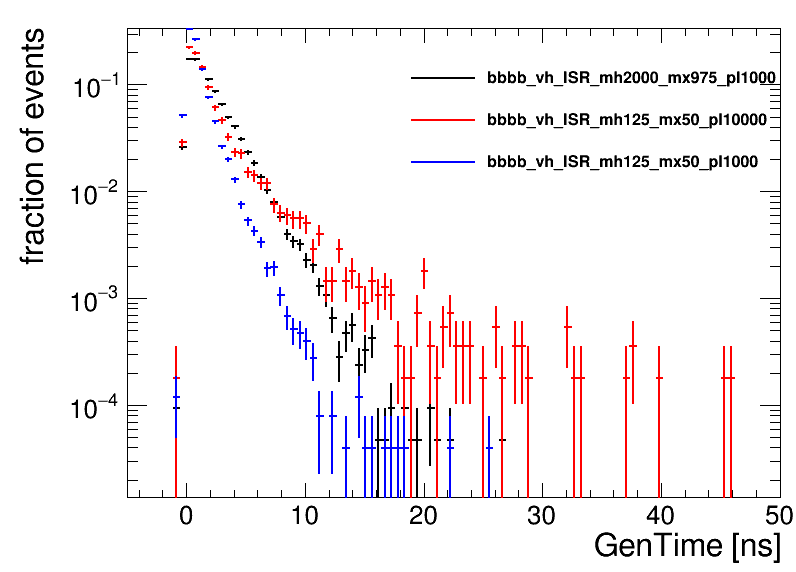

In [352]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.50,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

ht0 ={}
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()
    t = jetGenTime[:,0]
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50], weights = weight)
    ht0[k].SetLineColor(std_color_list[i])
    ht0[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(ht0[k],k)

    ht0[k].DrawNormalized('same')
    
    i += 1

leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_leading.png')
c.SaveAs(out_dir+'JetGenTime_leading.pdf')

bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


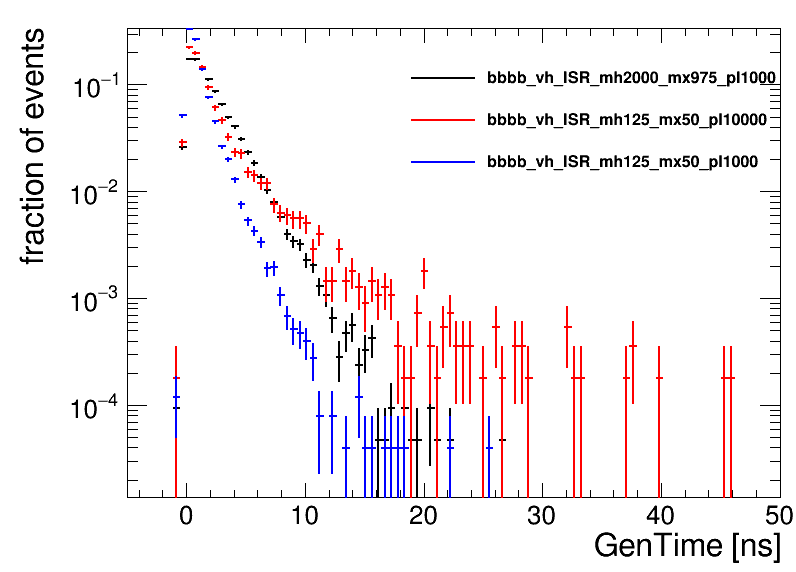

In [353]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.50,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

ht0 ={}
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()
    t = jetGenTime[:,0]
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50], weights = weight)
    ht0[k].SetLineColor(std_color_list[i])
    ht0[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(ht0[k],k)

    ht0[k].DrawNormalized('same')
    
    i += 1

leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_leading.png')
c.SaveAs(out_dir+'JetGenTime_leading.pdf')

bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


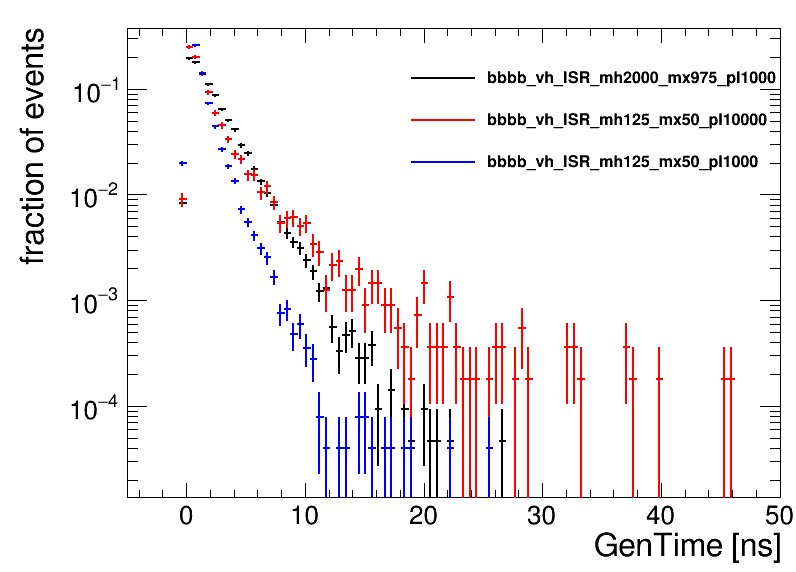

In [354]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.50,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

htt0 ={}
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()
#     LLP_Time = v['gLLP_travel_time'].array()
#     LLP_daughter_Time = v['gLLP_daughter_travel_time'].array()
#     photon_Time = v['photon_travel_time'].array()
    weight = v['genWeight'].array()
    t = jetGenTime[:,0] - BSTime
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    htt0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50], weights = weight)
    htt0[k].SetLineColor(std_color_list[i])
    htt0[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(htt0[k],k)

    htt0[k].DrawNormalized('same')
    
    i += 1

leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_MinusBS_leading.png')
c.SaveAs(out_dir+'JetGenTime_MinusBS_leading.pdf')

bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


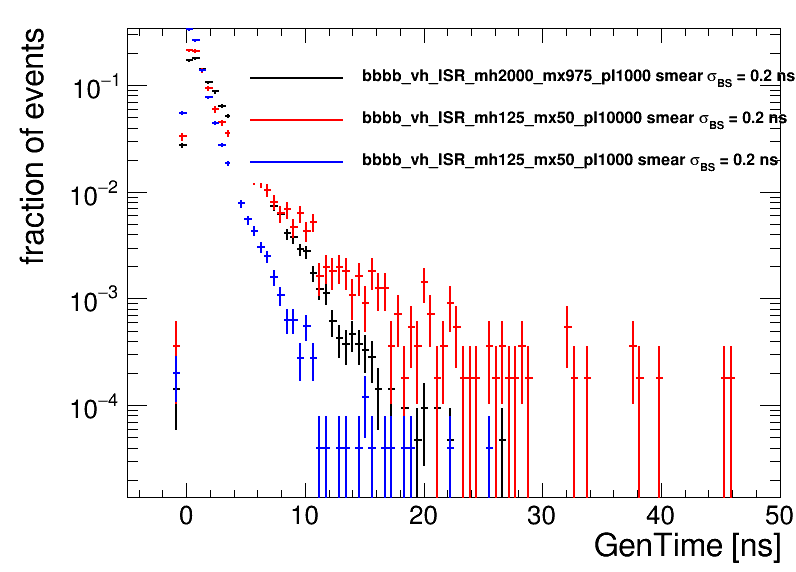

In [355]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.29,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hs ={}
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()
#     print(len(BSTime))
#     LLP_Time = v['gLLP_travel_time'].array()
#     LLP_daughter_Time = v['gLLP_daughter_travel_time'].array()
#     photon_Time = v['photon_travel_time'].array()
    weight = v['genWeight'].array()
    SmearTime = np.random.normal(0,0.2,len(BSTime))
    t = jetGenTime[:,0] - BSTime + SmearTime
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    hs[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50], weights = weight)
    hs[k].SetLineColor(std_color_list[i])
    hs[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(hs[k],k+' smear #sigma_{BS} = 0.2 ns')

    hs[k].DrawNormalized('same')
    
    i += 1

leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmear_leading.png')
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmear_leading.pdf')

bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


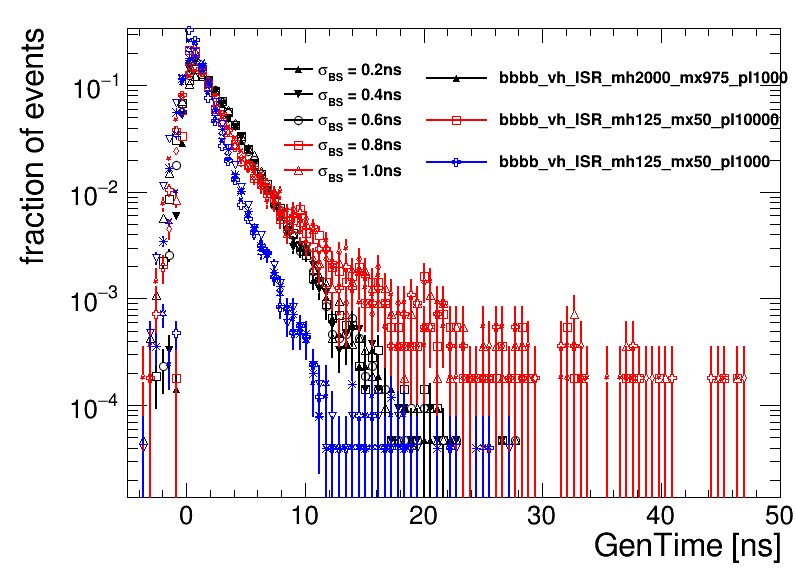

In [356]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.35,0.68,0.55,0.90);
leg1 = rt.TLegend(0.52,0.68,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hts = {}
SmearTime = {}
# print(len(tree))
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()
#     print(len(BSTime))
#     LLP_Time = v['gLLP_travel_time'].array()
#     LLP_daughter_Time = v['gLLP_daughter_travel_time'].array()
#     photon_Time = v['photon_travel_time'].array()
    weight = v['genWeight'].array()
    for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(tree)+j
        SmearTime[n] = np.random.normal(0,sig,len(BSTime))
        t = jetGenTime[:,0] - BSTime + SmearTime[n]
        hts[n] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k+str(j), binning=[100,-5,50], weights = weight)
        hts[n].SetLineColor(std_color_list[i])
        hts[n].SetMarkerColor(std_color_list[i])
        hts[n].SetMarkerStyle(22+n)

        if i==0:
            leg.AddEntry(hts[n],'#sigma_{BS} = '+str(sig)+'ns')
#             leg.AddEntry(hs[n],k)
        if j ==0:
            leg1.AddEntry(hts[n],k)
#         leg.AddEntry(hs[n],k+' #sigma_{BS} = '+str(sig)+'ns')
        hts[n].DrawNormalized('LPsame')
    
    i += 1

leg.SetBorderSize(0)
leg1.SetBorderSize(0)

leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_leading.png')
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_leading.pdf')

bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


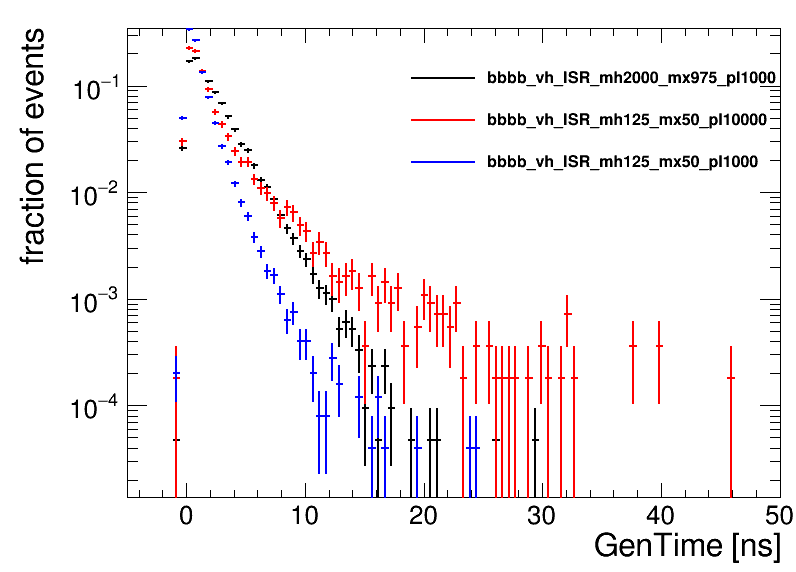

In [357]:
# plot subleading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.50,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

ht1 ={}
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()
    t = jetGenTime[:,1]
#     ht1[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    ht1[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50], weights = weight)
    ht1[k].SetLineColor(std_color_list[i])
    ht1[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(ht1[k],k)

    ht1[k].DrawNormalized('same')
    
    i += 1

leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_subleading.png')
c.SaveAs(out_dir+'JetGenTime_subleading.pdf')

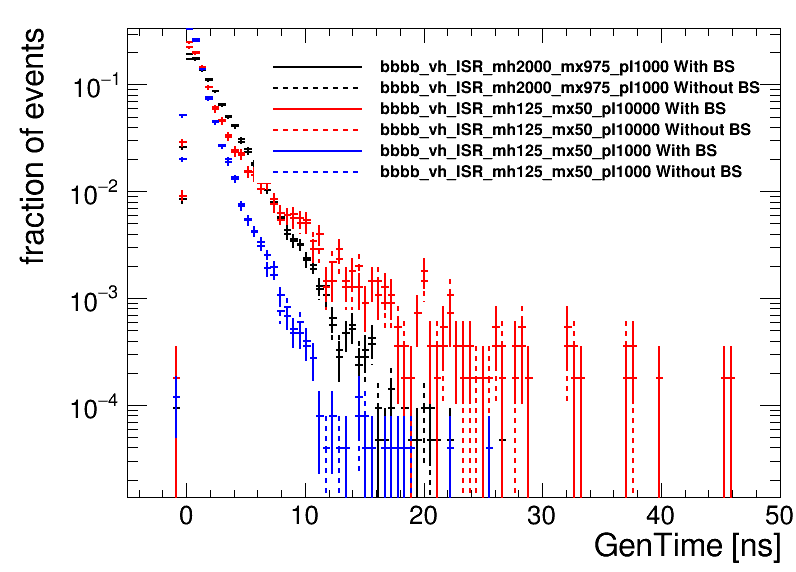

In [358]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

for k,v in tree.items():   

    ht0[k].SetLineStyle(1)
    ht0[k].SetLineColor(std_color_list[i])
    ht0[k].SetMarkerColor(std_color_list[i])

    htt0[k].SetLineStyle(7)
    htt0[k].SetLineColor(std_color_list[i])
    htt0[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(ht0[k],k+' With BS')
    leg.AddEntry(htt0[k],k+' Without BS')
    leg.SetBorderSize(0)
    #h[k].GetYaxis().SetRangeUser(0,500)
    if k==0:
        ht0[k].DrawNormalized('')
    else:
        ht0[k].DrawNormalized('same')
        htt0[k].DrawNormalized('same')
        
    i += 1

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_leading_w_wo_BS.png')
c.SaveAs(out_dir+'JetGenTime_leading_w_wo_BS.pdf')

bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


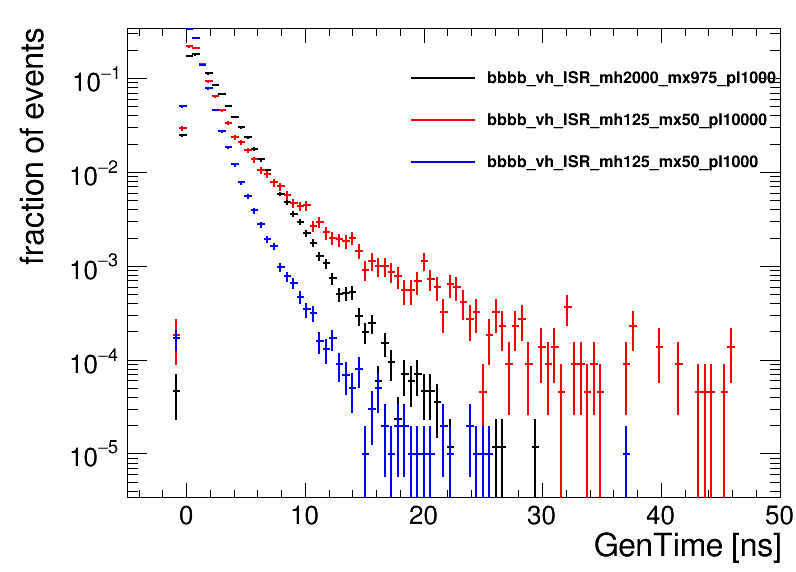

In [359]:
# plot all jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.50,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

ht ={}
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()
    sizes = [len(x) for x in jetGenTime]
    t = jetGenTime.flatten()
    flat_weight = []
    for j, (n, val) in enumerate(zip(sizes, weight)):
        #print n
        #print val
        #print n*[val]
        flat_weight += n*[val]
        #print flat_weight[k]
    flat_weight = np.array(flat_weight)
    # weight = tree['weight'].array()
#     ht[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    ht[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50], weights = flat_weight)
    ht[k].SetLineColor(std_color_list[i])
    ht[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(ht[k],k)

    ht[k].DrawNormalized('same')
    
    i += 1

leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_all.png')
c.SaveAs(out_dir+'JetGenTime_all.pdf')

In [360]:
# plot jet time rejection power inclusively

#time cuts
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
#print len(t_cuts)

maxes = []
# loop over events and get an array of maximum jet time in events
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()
    
    jetGenTime_max = []
    for evt, w in enumerate(weight):
#         print(evt,w)
#         print(jetGenTime[evt])
#         print(evt,np.amax(jetGenTime[evt]))
#         print(len(jetGenTime[evt]))
        if(len(jetGenTime[evt])>0):
            max_t =  np.amax(jetGenTime[evt])
            jetGenTime_max.append(max_t)
        else:
            jetGenTime_max.append(-666)
            
#         if evt>10:
#             break
    jetGenTime_max = np.array(jetGenTime_max)
    maxes.append(jetGenTime_max)
    print('found max jet gen time')
maxes = np.array(maxes)

bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
found max jet gen time
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
found max jet gen time
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>
found max jet gen time


In [361]:
print('lol')

lol


In [362]:
i = 0
Power_rej = []
Power_eff = []
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()
    
#     Ntotal_w = np.sum(weight)
#     print('tatal',Ntotal_w)

    Power_rej_i = []
    Power_eff_i = []

    jetGenTime_max = maxes[i] 

    for p, q in enumerate(t_cuts):
#         print(p,q)
        tcut_string = np.logical_and( jetGenTime_max > q, jetGenTime_max!=-666)
        tcut666_string = np.logical_and( jetGenTime_max, jetGenTime_max!=-666)
#         tcutted_t_v = jetGenTime_max[tcut_string]
        weight_cut666 = weight[tcut666_string]
        Ntotal_w = np.sum(weight_cut666)
#         print('tatal',Ntotal_w)

        tcutted_w_v = weight[tcut_string]
    #     Ntotal_w = tcutted_w_v.shape[0]
        Nsel_w = np.sum(tcutted_w_v)
#         print(Nsel_w)
        Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
        Prej_i = 1.0*Ntotal_w/Nsel_w
        Power_rej_i.append(Prej_i)
        Peff_i = 1.0*Nsel_w/Ntotal_w
        Power_eff_i.append(Peff_i)
        
    Power_rej_i = np.array(Power_rej_i) 
#     print('Rejection power',Power_rej_i)
    Power_rej.append(Power_rej_i)
    
    Power_eff_i = np.array(Power_eff_i) 
    print('Signal Efficiency',Power_eff_i)
    Power_eff.append(Power_eff_i)
    
    i += 1
    
Power_rej = np.array(Power_rej)        
Power_eff = np.array(Power_eff)


bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
Signal Efficiency [1.         1.         1.         1.         1.         1.
 1.         0.99996142 0.99922802 0.99482801 0.98189815 0.96020685
 0.93060323 0.89490133 0.85611175 0.64938824 0.45493843 0.30244315
 0.19711296]
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
Signal Efficiency [1.         1.         1.         1.         1.         1.
 0.99992011 0.99864129 0.99296679 0.96787091 0.90752876 0.83088241
 0.74704284 0.67239453 0.59998405 0.36077364 0.23905051 0.1690377
 0.125     ]
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>
Signal Efficiency [1.         1.         1.         1.         1.         1.
 0.99986374 0.99868302 0.99032719 0.95974204 0.88980721 0.78958245
 0.68309077 0.58479601 0.50096502 0.23398652 0.11487023 0.05994414
 0.03349152]


bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


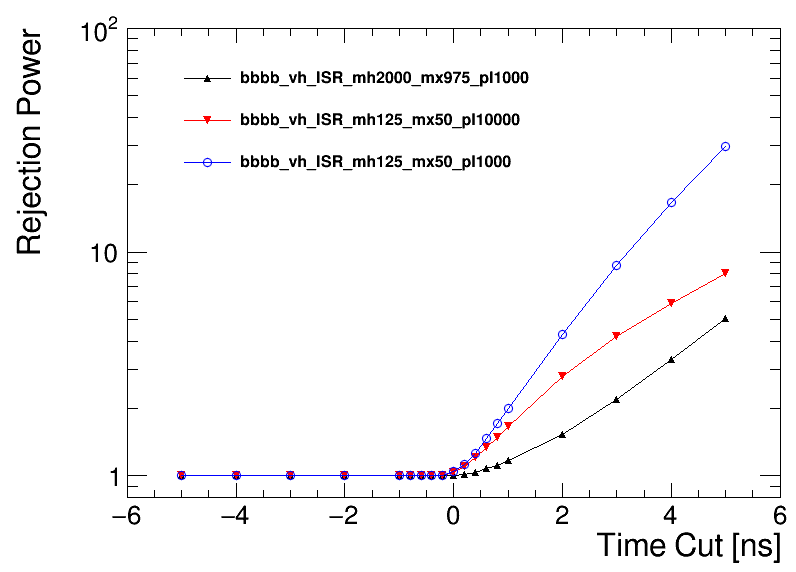

In [363]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.68,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)

for k,v in tree.items():   
    print(k, v)

    Power_rej_i = Power_rej[i] 
    
    power = np.array(Power_rej_i) 
    #print num, t_cuts, power
    hrej[k] = rt.TGraph(num , t_cuts, power)

    hrej[k].SetLineColor(std_color_list[i])
    hrej[k].SetMarkerColor(std_color_list[i])
    hrej[k].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)


    leg.SetBorderSize(0)
    leg.AddEntry(hrej[k],k)

    hrej[k].SetTitle( 'Rejection Power' )
    hrej[k].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej[k].GetYaxis().SetRangeUser(0.8,100)
    hrej[k].GetYaxis().SetTitle( 'Rejection Power' )
    if i==0 :
        hrej[k].Draw('ALPsame')
    else:
        hrej[k].Draw('LPsame')
    
    i += 1


leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_GenTimeMax_Time.png')
c.SaveAs(out_dir+'RejectionPower_GenTimeMax_Time.pdf')


bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


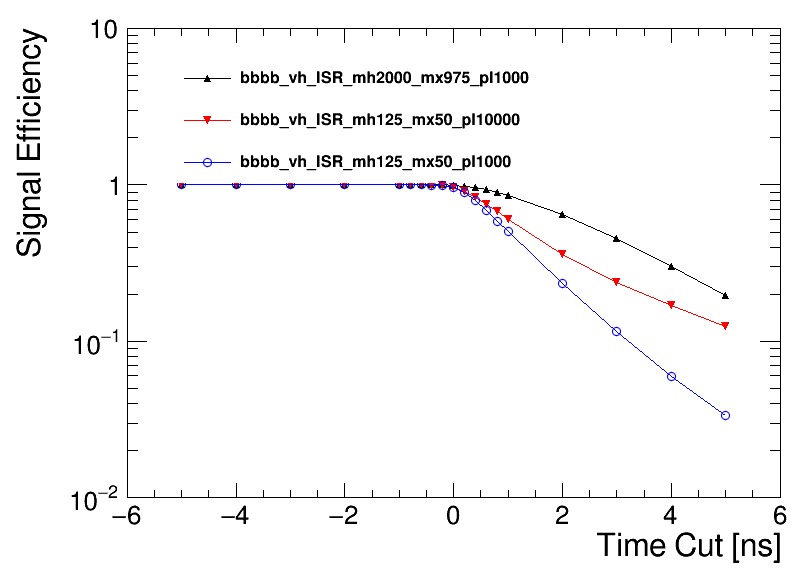

In [364]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.68,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

heff = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)

for k,v in tree.items():   
    print(k, v)

    Power_eff_i = Power_eff[i] 
    
    power = np.array(Power_eff_i) 
    #print num, t_cuts, power
    heff[k] = rt.TGraph(num , t_cuts, power)

    heff[k].SetLineColor(std_color_list[i])
    heff[k].SetMarkerColor(std_color_list[i])
    heff[k].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)


    leg.SetBorderSize(0)
    leg.AddEntry(heff[k],k)

    heff[k].SetTitle( 'Signal Efficiency' )
    heff[k].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    heff[k].GetYaxis().SetRangeUser(1e-2,1e1)
    heff[k].GetYaxis().SetTitle( 'Signal Efficiency' )
    if i==0 :
        heff[k].Draw('ALPsame')
    else:
        heff[k].Draw('LPsame')
    
    i += 1


leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTimeMax_Time.png')
c.SaveAs(out_dir+'SignalEff_GenTimeMax_Time.pdf')


In [365]:
#sort lists based on list1 and require list1 to be valid
def sort_valid_lists(list1, list2): 
    list3 = []
    for index, (ele1,ele2) in enumerate(zip(list1,list2)): 
#         print(index,ele1,ele2)
        if not math.isnan(ele1):
#             print("ele1 is not nan")
            list3.append(tuple((ele1,ele2)))
    list3.sort(key=lambda x: x[0])
    return list3 

In [366]:
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
#print len(t_cuts)

firsts = []
seconds = []
# loop over events and get an array of maximum jet time in events
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    jetPt = v['gLLP_daughter_pt'].array()
    weight = v['genWeight'].array()
    
    jetTime_most_delayed = []
    jetTime_second_delayed = []

    for i, (time, pt) in enumerate(zip(jetGenTime,jetPt)):
#         print(i,time,pt,len(time),len(pt))
        time_s =[]
        pt_s= []
        for j in range(len(time)):
#             print(j,pt[j])
            time_s.append(time[j])
            pt_s.append(pt[j])
#         print(i,time_s)
#         print(i,pt_s)
        validpairlist = sort_valid_lists(time_s,pt_s)
#         print(i,validpairlist)
#         print(validpairlist[-1][0])
        if len(validpairlist)>1 :
#             print(i,len(validpairlist))
#             print(i,validpairlist[-1][0],validpairlist[-2][0])
            jetTime_most_delayed.append(validpairlist[-1][0])
            jetTime_second_delayed.append(validpairlist[-2][0])
        else:
            jetTime_most_delayed.append(-666)
            jetTime_second_delayed.append(-666)
#         if i>2:
#             break
    jetTime_most_delayed = np.array(jetTime_most_delayed)
    jetTime_second_delayed = np.array(jetTime_second_delayed)
    
    firsts.append(jetTime_most_delayed)
    seconds.append(jetTime_second_delayed)
    print('found max jet gen time')

firsts = np.array(firsts)
seconds = np.array(seconds)
print('found max jet gen time')



bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
found max jet gen time
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
found max jet gen time
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>
found max jet gen time
found max jet gen time


In [367]:
i = 0
Power_rej_2j = []
Power_eff_2j = []
for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()
    
#     Ntotal_w = np.sum(weight)
#     print('tatal',Ntotal_w)

    Power_rej_2j_i = []
    Power_eff_2j_i = []

    jetGenTime_max = firsts[i] 
    jetGenTime_second = seconds[i] 

    for p, q in enumerate(t_cuts):
#         print(p,q)
#         tcut_string = np.logical_and( jetGenTime_max > q, jetGenTime_max!=-666)
#         tcutted_t_v = jetGenTime_max[tcut_string]
        tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max!=-666)
#         tcutted_t1_v = jetGenTime_max[tcut_string1]
        tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second!=-666)
#         tcutted_t2_v = jetGenTime_second[tcut_string2]
        tcut_string = np.logical_and( tcut_string1, tcut_string2)
#         print(tcut_string)
#         tcut666_string = np.logical_and( jetGenTime_max, jetGenTime_max!=-666)
        tcut666_string = np.logical_and( jetGenTime_second!=-666, jetGenTime_max!=-666)
        weight_cut666 = weight[tcut666_string]
        Ntotal_w = np.sum(weight_cut666)
#         print('tatal',Ntotal_w)

        tcutted_w_v = weight[tcut_string]
        tcutted_w1_v = weight[tcut_string1]
        tcutted_w2_v = weight[tcut_string2]
#         Nsel_w = np.sum(tcutted_w_v)
        Nsel_w = np.sum(tcutted_w_v)
#         print(Nsel_w)
        Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
        Prej_2j_i = 1.0*Ntotal_w/Nsel_w
        Power_rej_2j_i.append(Prej_2j_i)
        Peff_2j_i = 1.0*Nsel_w/Ntotal_w
        Power_eff_2j_i.append(Peff_2j_i)
        
    Power_rej_2j_i = np.array(Power_rej_2j_i) 
# #     print('Rejection power',Power_rej_i)
    Power_rej_2j.append(Power_rej_2j_i)
    
    Power_eff_2j_i = np.array(Power_eff_2j_i) 
    print('Signal Efficiency',Power_eff_2j_i)
    Power_eff_2j.append(Power_eff_2j_i)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_eff_2j = np.array(Power_eff_2j)
print(Power_eff_2j)


bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
Signal Efficiency [1.         1.         1.         1.         1.         1.
 1.         0.99959773 0.99593722 0.98149633 0.94593724 0.89851163
 0.84151244 0.78193882 0.72751406 0.4775543  0.29292036 0.17835879
 0.10816571]
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
Signal Efficiency [1.         1.         1.         1.         1.         1.
 0.99964439 0.99798528 0.98625259 0.94880299 0.87366665 0.77577613
 0.67930781 0.5986015  0.52690195 0.30860389 0.20431382 0.14730978
 0.11258591]
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>
Signal Efficiency [1.         1.         1.         1.         1.         0.99996837
 0.99981016 0.99740522 0.98395668 0.93253592 0.82621357 0.68929184
 0.56312891 0.45557242 0.36928044 0.1398329  0.060724   0.02841592
 0.0147459 ]
[[1.         1.         1.         1.         1.         1.
  1.         0.99959773 0.99593722 0.98149633 0.94593724 0.89851163


bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


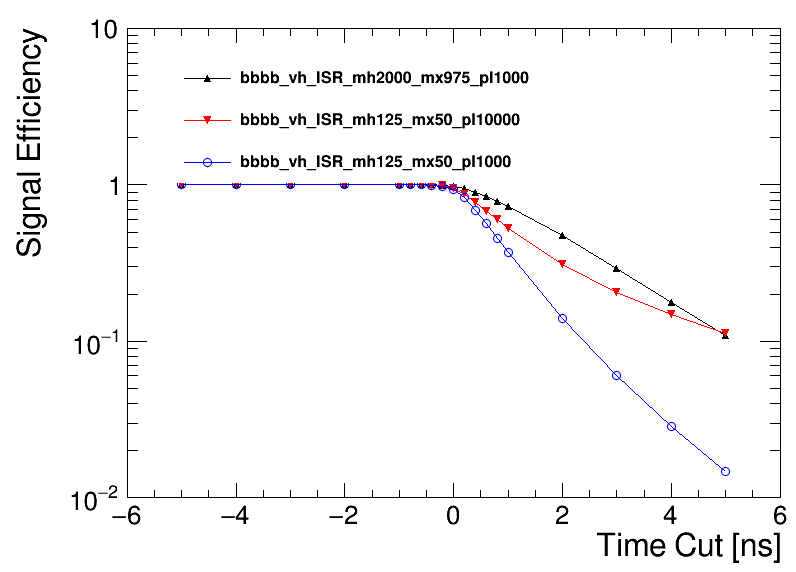

In [368]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.68,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

heff2 = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)

# for k,v in tree.items():   
#     print(k, v)

#     Power_eff_i = Power_eff[i] 
    
#     power = np.array(Power_eff_i) 
#     #print num, t_cuts, power
#     heff[k] = rt.TGraph(num , t_cuts, power)

#     heff[k].SetLineColor(std_color_list[i])
#     heff[k].SetMarkerColor(std_color_list[i])
#     heff[k].SetMarkerStyle(22+i)
#     #     hrej[m].SetMarkerSize(2)


#     leg.SetBorderSize(0)
#     leg.AddEntry(heff[k],k)

#     heff[k].SetTitle( 'Signal Efficiency' )
#     heff[k].GetXaxis().SetTitle( 'Time Cut [ns]' )
#     #hrej[m].GetXaxis().SetRangeUser(-10,10)
#     heff[k].GetYaxis().SetRangeUser(1e-2,1e1)
#     heff[k].GetYaxis().SetTitle( 'Signal Efficiency' )
#     if i==0 :
#         heff[k].Draw('ALPsame')
#     else:
#         heff[k].Draw('LPsame')
    
#     i += 1

for k,v in tree.items():   
    print(k, v)

    Power_eff_i = Power_eff_2j[i] 
    
    power = np.array(Power_eff_i) 
    #print num, t_cuts, power
    heff2[k] = rt.TGraph(num , t_cuts, power)

    heff2[k].SetLineColor(std_color_list[i])
    heff2[k].SetMarkerColor(std_color_list[i])
    heff2[k].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)


    leg.SetBorderSize(0)
    leg.AddEntry(heff2[k],k)

    heff2[k].SetTitle( 'Signal Efficiency' )
    heff2[k].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    heff2[k].GetYaxis().SetRangeUser(1e-2,1e1)
    heff2[k].GetYaxis().SetTitle( 'Signal Efficiency' )
    if i==0 :
        heff2[k].Draw('ALPsame')
    else:
        heff2[k].Draw('LPsame')
    
    i += 1


leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTimeSecond_Time.png')
c.SaveAs(out_dir+'SignalEff_GenTimeSecond_Time.pdf')


bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


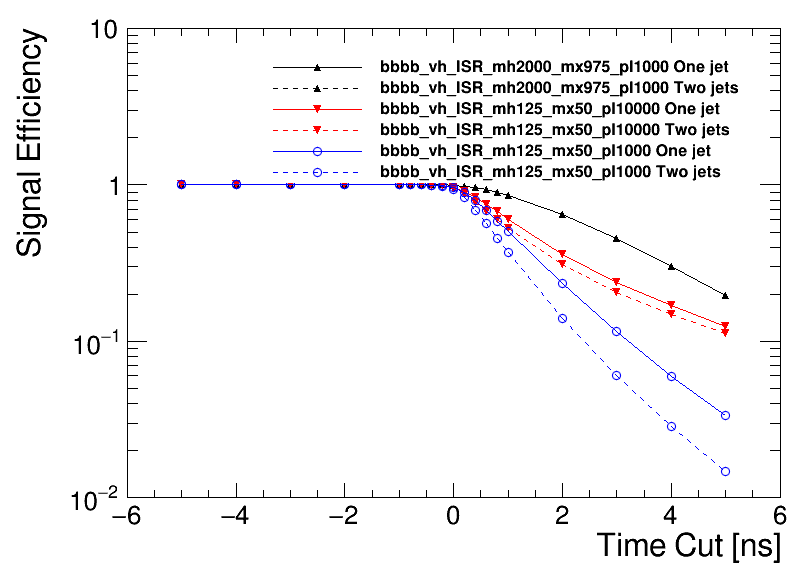

In [369]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

h1 = {}
h2 = {}

for k,v in tree.items():   
    print(k, v)

    Power_eff_i = Power_eff[i] 
    
    power1 = np.array(Power_eff_i) 
    #print num, t_cuts, power
    h1[k] = rt.TGraph(num , t_cuts, power1)
    
    Power_eff_2j_i = Power_eff_2j[i] 
    
    power2 = np.array(Power_eff_2j_i) 
    h2[k] = rt.TGraph(num , t_cuts, power2)

    h1[k].SetLineColor(std_color_list[i])
    h1[k].SetMarkerColor(std_color_list[i])
    h1[k].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)
    
    h2[k].SetLineStyle(7)
    h2[k].SetLineColor(std_color_list[i])
    h2[k].SetMarkerColor(std_color_list[i])
    h2[k].SetMarkerStyle(22+i)


    leg.SetBorderSize(0)
    leg.AddEntry(h1[k],k+' One jet')
    leg.AddEntry(h2[k],k+' Two jets')

    h1[k].SetTitle( 'Signal Efficiency' )
    h1[k].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    h1[k].GetYaxis().SetRangeUser(1e-2,1e1)
    h1[k].GetYaxis().SetTitle( 'Signal Efficiency' )
    if i==0 :
        h1[k].Draw('ALPsame')
    else:
        h1[k].Draw('LPsame')
        h2[k].Draw('LPsame')
    
    i += 1


leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time.pdf')


bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


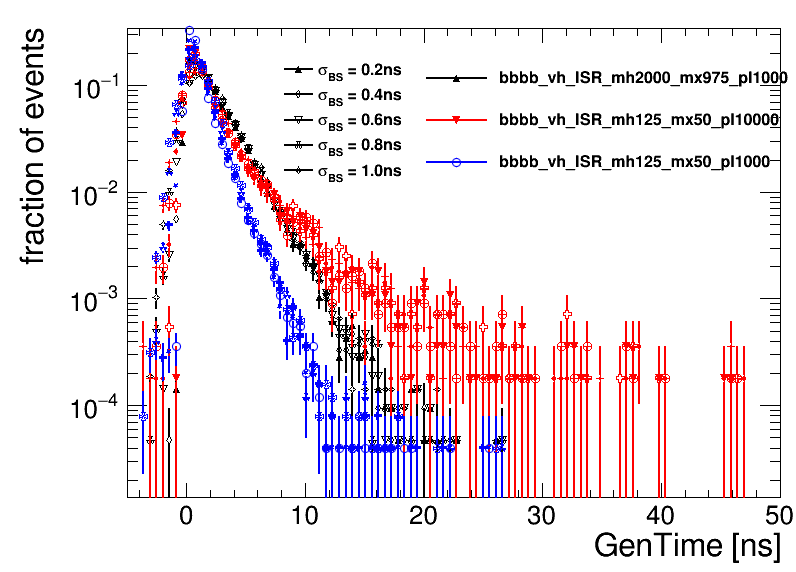

In [370]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.35,0.68,0.55,0.90);
leg1 = rt.TLegend(0.52,0.68,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hts = {}
SmearTime = {}
# print(len(tree))
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()
#     print(len(BSTime))
#     LLP_Time = v['gLLP_travel_time'].array()
#     LLP_daughter_Time = v['gLLP_daughter_travel_time'].array()
#     photon_Time = v['photon_travel_time'].array()
    weight = v['genWeight'].array()
    for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i+j*len(sigma)
#         print(i,j,n)
        SmearTime[n] = np.random.normal(0,sig,len(BSTime))
        t = jetGenTime[:,0] - BSTime + SmearTime[n]
        hts[n] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k+str(j), binning=[100,-5,50], weights = weight)
        hts[n].SetLineColor(std_color_list[i])
        hts[n].SetMarkerColor(std_color_list[i])
        hts[n].SetMarkerStyle(22+n)

        if i==0:
            leg.AddEntry(hts[n],'#sigma_{BS} = '+str(sig)+'ns')
#             leg.AddEntry(hs[n],k)
        if j ==0:
            leg1.AddEntry(hts[n],k)
#         leg.AddEntry(hs[n],k+' #sigma_{BS} = '+str(sig)+'ns')
        hts[n].DrawNormalized('LPsame')
    
    i += 1

leg.SetBorderSize(0)
leg1.SetBorderSize(0)

leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_leading.png')
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_leading.pdf')

bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


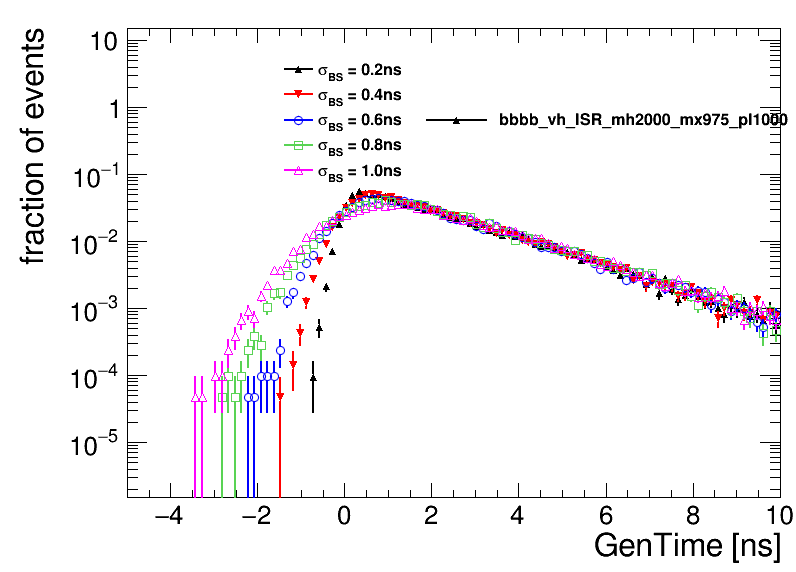

In [371]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.35,0.68,0.55,0.90);
leg1 = rt.TLegend(0.52,0.68,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hts1 = {}
SmearTime = {}
# print(len(tree))
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()
#     print(len(BSTime))
#     LLP_Time = v['gLLP_travel_time'].array()
#     LLP_daughter_Time = v['gLLP_daughter_travel_time'].array()
#     photon_Time = v['photon_travel_time'].array()
    weight = v['genWeight'].array()
    for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
        SmearTime[n] = np.random.normal(0,sig,len(BSTime))
        t = jetGenTime[:,0] - BSTime + SmearTime[n]
        hts1[n] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k+str(j), binning=[100,-5,10], weights = weight)
        hts1[n].SetLineColor(std_color_list[j])
        hts1[n].GetYaxis().SetRangeUser(1e-5,1e2)
        hts1[n].SetMarkerColor(std_color_list[j])
        hts1[n].SetMarkerStyle(22+n)

        if i==0:
            leg.AddEntry(hts1[n],'#sigma_{BS} = '+str(sig)+'ns')
#             leg.AddEntry(hs[n],k)
#         if j ==0:
        if i ==0 and j==0:
            leg1.AddEntry(hts1[n],k)
#         leg.AddEntry(hs[n],k+' #sigma_{BS} = '+str(sig)+'ns')
        if i==0:
            hts1[n].DrawNormalized('LPsame')
    
    i += 1

leg.SetBorderSize(0)
leg1.SetBorderSize(0)

leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_1_leading.png')
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_1_leading.pdf')

bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


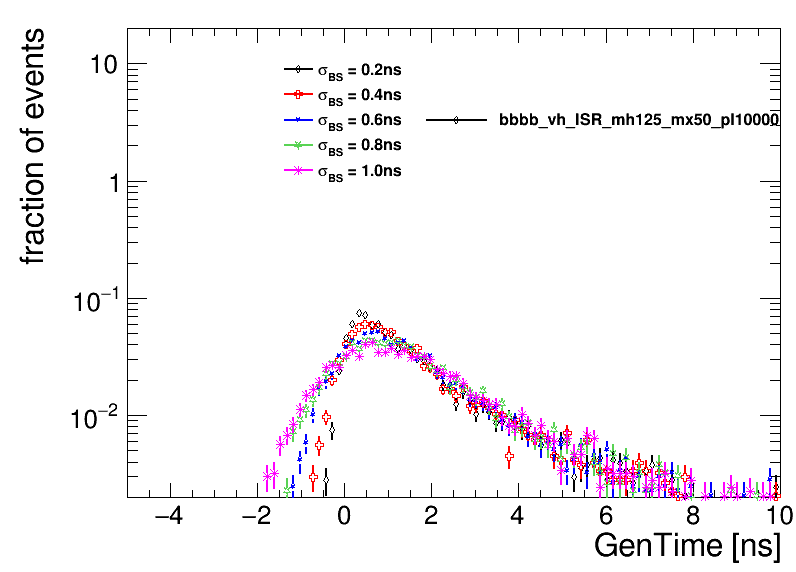

In [372]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.35,0.68,0.55,0.90);
leg1 = rt.TLegend(0.52,0.68,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hts1 = {}
SmearTime = {}
# print(len(tree))
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()
#     print(len(BSTime))
#     LLP_Time = v['gLLP_travel_time'].array()
#     LLP_daughter_Time = v['gLLP_daughter_travel_time'].array()
#     photon_Time = v['photon_travel_time'].array()
    weight = v['genWeight'].array()
    for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
        SmearTime[n] = np.random.normal(0,sig,len(BSTime))
        t = jetGenTime[:,0] - BSTime + SmearTime[n]
        hts1[n] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k+str(j), binning=[100,-5,10], weights = weight)
        hts1[n].SetLineColor(std_color_list[j])
        hts1[n].GetYaxis().SetRangeUser(1e-5,1e-1)
        hts1[n].SetMarkerColor(std_color_list[j])
        hts1[n].SetMarkerStyle(22+n)

        if i==1:
            leg.AddEntry(hts1[n],'#sigma_{BS} = '+str(sig)+'ns')
#             leg.AddEntry(hs[n],k)
#         if j ==0:
        if i ==1 and j==0:
            leg1.AddEntry(hts1[n],k)
#         leg.AddEntry(hs[n],k+' #sigma_{BS} = '+str(sig)+'ns')
        if i==1:
            hts1[n].DrawNormalized('LPsame')
    
    i += 1

leg.SetBorderSize(0)
leg1.SetBorderSize(0)

leg.Draw()
leg1.Draw()
c.SetLogy()
# c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_2_leading.png')
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_2_leading.pdf')

bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


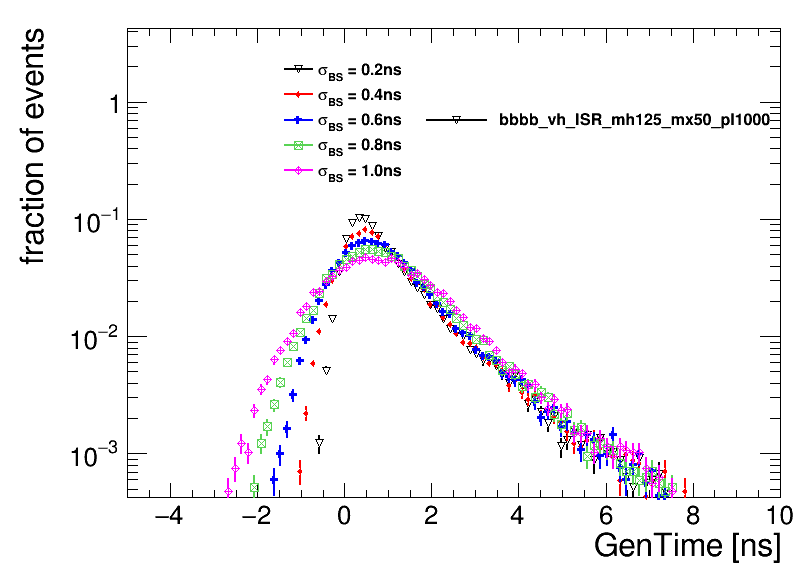

In [373]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.35,0.68,0.55,0.90);
leg1 = rt.TLegend(0.52,0.68,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hts1 = {}
SmearTime = {}
# print(len(tree))
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()
#     print(len(BSTime))
#     LLP_Time = v['gLLP_travel_time'].array()
#     LLP_daughter_Time = v['gLLP_daughter_travel_time'].array()
#     photon_Time = v['photon_travel_time'].array()
    weight = v['genWeight'].array()
    for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
        SmearTime[n] = np.random.normal(0,sig,len(BSTime))
        t = jetGenTime[:,0] - BSTime + SmearTime[n]
        hts1[n] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k+str(j), binning=[100,-5,10], weights = weight)
        hts1[n].SetLineColor(std_color_list[j])
        hts1[n].GetYaxis().SetRangeUser(1e-5,1e-1)
        hts1[n].SetMarkerColor(std_color_list[j])
        hts1[n].SetMarkerStyle(22+n)

        if i==2:
            leg.AddEntry(hts1[n],'#sigma_{BS} = '+str(sig)+'ns')
#             leg.AddEntry(hs[n],k)
#         if j ==0:
        if i ==2 and j==0:
            leg1.AddEntry(hts1[n],k)
#         leg.AddEntry(hs[n],k+' #sigma_{BS} = '+str(sig)+'ns')
        if i==2:
            hts1[n].DrawNormalized('LPsame')
    
    i += 1

leg.SetBorderSize(0)
leg1.SetBorderSize(0)

leg.Draw()
leg1.Draw()
c.SetLogy()
# c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_3_leading.png')
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_3_leading.pdf')

In [374]:
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
print(len(t_cuts))
sigma = [0.2,0.4,0.6,0.8,1.]
print(len(sigma))
print(len(tree))
ntr = len(tree)

i=0

Firsts = []
Seconds = []
# loop over events and get an array of maximum jet time in events
for k,v in tree.items():   

#         print(i, k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()

    jetTime = [x-y for x,y in zip(jetGenTime,BSTime)]
    
#     print(jetGenTime[0],BSTime[0], jetTime[0])

    jetPt = v['gLLP_daughter_pt'].array()
    weight = v['genWeight'].array()
    
    for j,sig in enumerate(sigma):
#     for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
#         print('n',n)
        print(i, j, n,len(weight))
        SmearTime = np.random.normal(0,sig,len(BSTime))
        jetNewTime = [x+y for x,y in zip(jetTime,SmearTime)]
#         print(jetTime[0],SmearTime[0], jetNewTime[0])    

    
        jetTime_most_delayed = []
        jetTime_second_delayed = []

        for evt, (time, pt) in enumerate(zip(jetNewTime,jetPt)):
    #         print(i,time,pt,len(time),len(pt))
            time_s =[]
            pt_s= []
            for par in range(len(time)):
    #             print(j,pt[j])
                time_s.append(time[par])
                pt_s.append(pt[par])
    #         print(i,time_s)
    #         print(i,pt_s)
            validpairlist = sort_valid_lists(time_s,pt_s)
    #         print(i,validpairlist)
    #         print(validpairlist[-1][0])
            if len(validpairlist)>1 :
    #             print(i,len(validpairlist))
    #             print(i,validpairlist[-1][0],validpairlist[-2][0])
                jetTime_most_delayed.append(validpairlist[-1][0])
                jetTime_second_delayed.append(validpairlist[-2][0])
            else:
                jetTime_most_delayed.append(-666)
                jetTime_second_delayed.append(-666)
#             if i>2:
#                 break
        jetTime_most_delayed = np.array(jetTime_most_delayed)
        jetTime_second_delayed = np.array(jetTime_second_delayed)
#         print(i, j, n,len(jetTime_most_delayed),len(jetTime_second_delayed))
    
        Firsts.append(jetTime_most_delayed)
        Seconds.append(jetTime_second_delayed)
#         print(n,'found max jet gen time')

    i += 1
    
Firsts = np.array(Firsts)
Seconds = np.array(Seconds)
print('found max, second jet gen time')
print(len(Firsts),len(Seconds))


19
5
3
0 0 0 26133
0 1 1 26133
0 2 2 26133
0 3 3 26133
0 4 4 26133
1 0 5 82611
1 1 6 82611
1 2 7 82611
1 3 8 82611
1 4 9 82611
2 0 10 74588
2 1 11 74588
2 2 12 74588
2 3 13 74588
2 4 14 74588
found max, second jet gen time
15 15


In [375]:
i = 0
Power_1j = []
Power_2j = []

for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()



    for j,sig in enumerate(sigma):
#         print(j,sig)

        Power_eff_1j = []
        Power_eff_2j = []

        n = i*len(sigma)+j
#         print(n)
#         print(i,j,n,len(weight))

        jetGenTime_max = Firsts[n] 
        jetGenTime_second = Seconds[n] 
        print(len(weight),len(Firsts[n]),len(Seconds[n]))
        
        for p, q in enumerate(t_cuts):
#             print(p,q)
#             n = i*ntr+j
#             jetGenTime_max = Firsts[n] 
#             jetGenTime_second = Seconds[n] 
#             if i==1 :
#                 print(len(weight),len(Firsts[n]),len(Seconds[n]))

            tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max>-600)
            tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second>-600)
            tcut_string = np.logical_and( tcut_string1, tcut_string2)
    #         print(tcut_string)
            tcut666_string1 = np.logical_and( jetGenTime_max, jetGenTime_max>-600)
            tcut666_string = np.logical_and( jetGenTime_second>-600, jetGenTime_max>-600)
    #         print(tcut666_string1)
    #         print(tcut666_string)
            weight1_cut666 = weight[tcut666_string1]
            weight_cut666 = weight[tcut666_string]
            Ntotal_1j_w = np.sum(weight1_cut666)
            Ntotal_2j_w = np.sum(weight_cut666)
    #         print('1j total',Ntotal_1j_w)
    #         print('2j total',Ntotal_2j_w)

            tcutted_w_v = weight[tcut_string]
            tcutted_w1_v = weight[tcut_string1]
            tcutted_w2_v = weight[tcut_string2]
    #         Nsel_w = np.sum(tcutted_w_v)
            Nsel_1j_w = np.sum(tcutted_w1_v)
            Nsel_2j_w = np.sum(tcutted_w_v)
    #         print(Nsel_w)
    #         Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
    #         Prej_2j_i = 1.0*Ntotal_w/Nsel_w
    #         Power_rej_2j_i.append(Prej_2j_i)
            Peff_1j_i = 1.0*Nsel_1j_w/Ntotal_1j_w
            Peff_2j_i = 1.0*Nsel_2j_w/Ntotal_2j_w
            Power_eff_1j.append(Peff_1j_i)
            Power_eff_2j.append(Peff_2j_i)

    #     Power_rej_2j_i = np.array(Power_rej_2j_i) 
    # #     print('Rejection power',Power_rej_i)
    #     Power_rej_2j.append(Power_rej_2j_i)

        Power_eff_1j = np.array(Power_eff_1j) 
        Power_eff_2j = np.array(Power_eff_2j) 
#         print('Signal Efficiency 1jet: ',Power_eff_1j)
#         print('Signal Efficiency 2jet: ',Power_eff_2j)
        Power_1j.append(Power_eff_1j)
        Power_2j.append(Power_eff_2j)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_1j = np.array(Power_1j)
Power_2j = np.array(Power_2j)
print(Power_1j)
print(Power_2j)


bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
26133 26133 26133
26133 26133 26133
26133 26133 26133
26133 26133 26133
26133 26133 26133
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
82611 82611 82611
82611 82611 82611
82611 82611 82611
82611 82611 82611
82611 82611 82611
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>
74588 74588 74588
74588 74588 74588
74588 74588 74588
74588 74588 74588
74588 74588 74588
[[1.         1.         1.         1.         1.         1.
  0.99992284 0.9997684  0.99861049 0.99394029 0.9822842  0.95939635
  0.93044885 0.89644528 0.85526261 0.64830755 0.45335596 0.30371686
  0.19719015]
 [1.         1.         1.         1.         0.99988426 0.99961407
  0.99872635 0.99644912 0.99185609 0.98378945 0.96985601 0.94774014
  0.92114709 0.88922766 0.85279248 0.64938824 0.45601915 0.3065344
  0.19854102]
 [1.         1.         1.         1.         0.99915086 0.99776135
  0.99505961 0.99054386 0.98255427 0.971670

bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


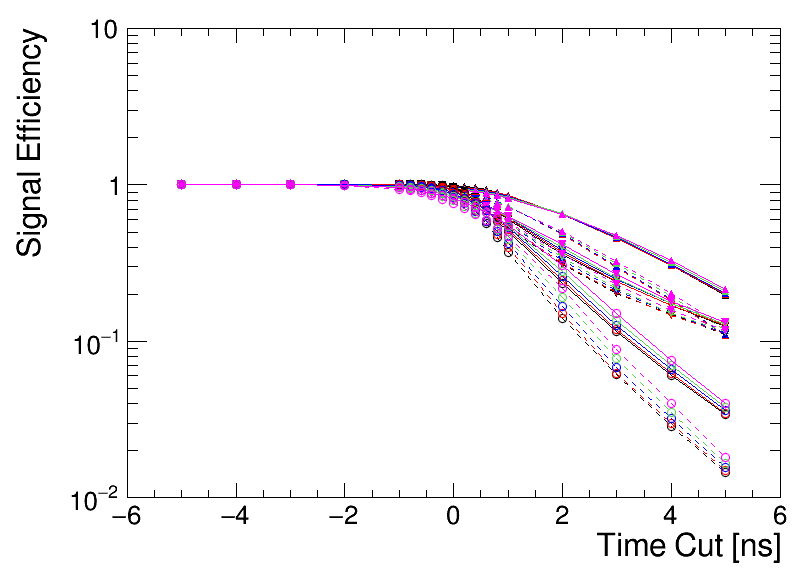

In [376]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
        leg.AddEntry(h1s[i],k+' One jet')
        leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if i==0 :
            h1s[i].Draw('ALPsame')
        else:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
    
    n += 1


# leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear.pdf')


bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


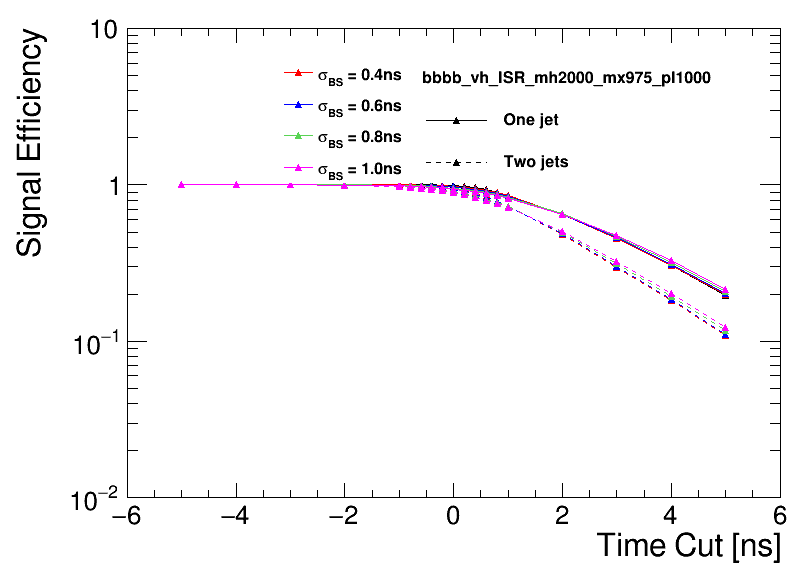

In [377]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.68,0.55,0.90);
leg1 = rt.TLegend(0.52,0.68,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==0 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(k)
            leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
        elif n==0:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1.pdf')


bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


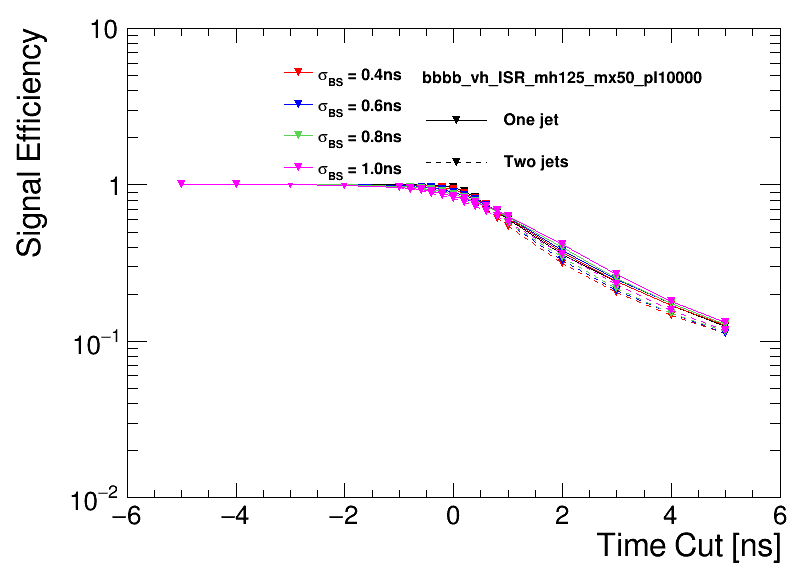

In [378]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.68,0.55,0.90);
leg1 = rt.TLegend(0.52,0.68,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==1 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(k)
            leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
        elif n==1:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear2.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear2.pdf')


bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


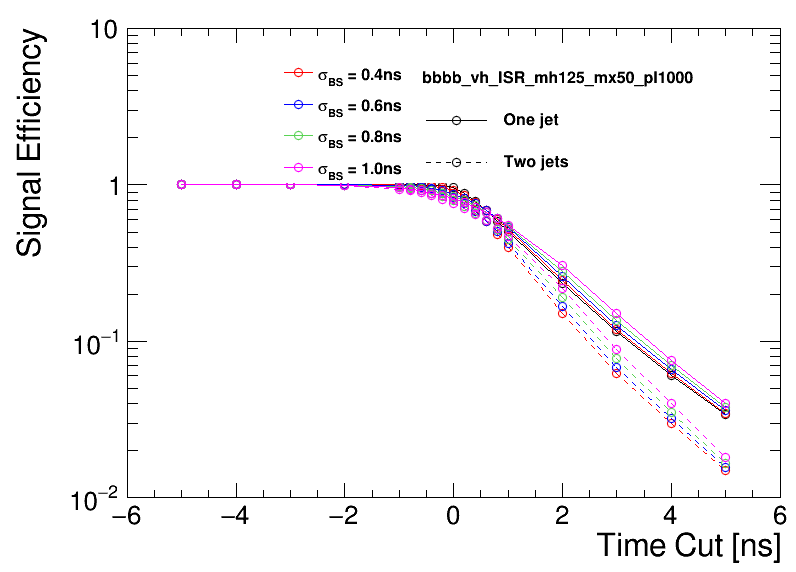

In [379]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.68,0.55,0.90);
leg1 = rt.TLegend(0.52,0.68,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==2 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(k)
            leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
        elif n==2:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3.pdf')


bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


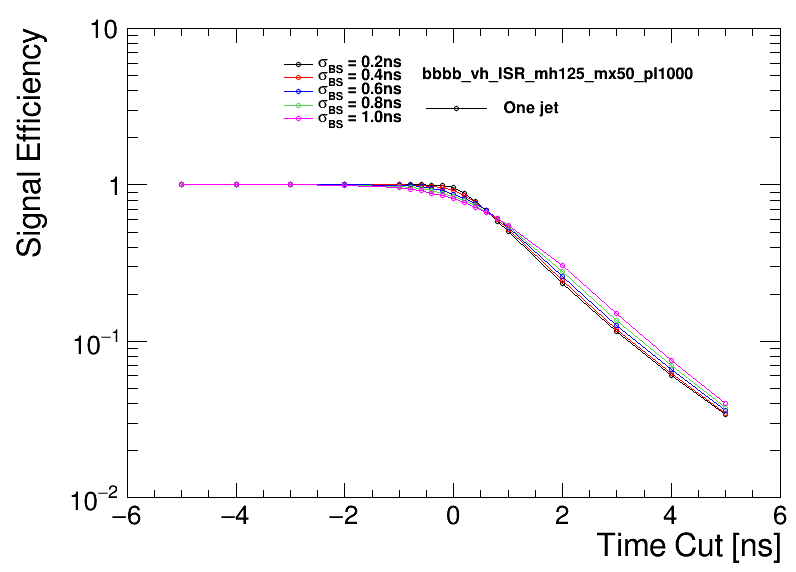

In [380]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.78,0.55,0.90);
leg1 = rt.TLegend(0.52,0.78,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].SetMarkerSize(0.5)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].SetMarkerSize(0.5)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==2 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(k)
            leg1.AddEntry(h1s[i],' One jet')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             leg1.AddEntry(h2s[i],' Two jets')
        elif n==2:
            h1s[i].Draw('LPsame')
#             h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_1jet.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_1jet.pdf')


bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


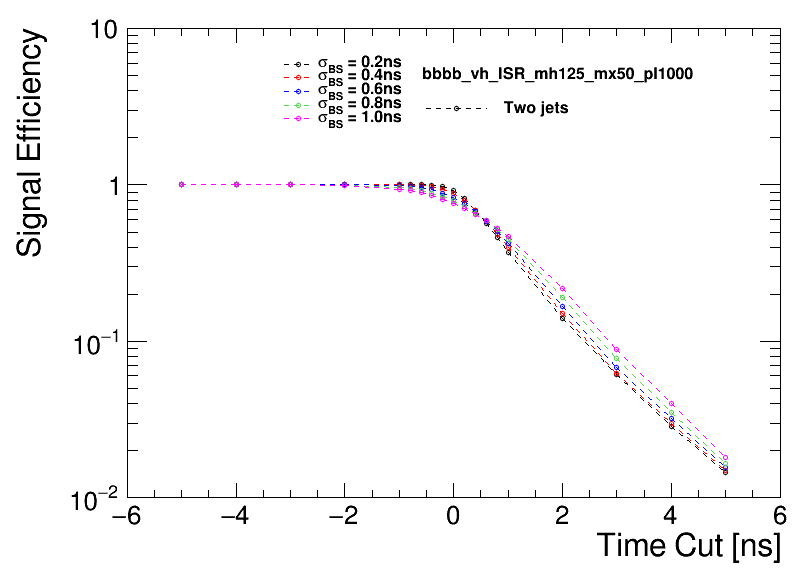

In [381]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.78,0.55,0.90);
leg1 = rt.TLegend(0.52,0.78,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].SetMarkerSize(0.5)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].SetMarkerSize(0.5)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h2s[i].SetTitle( 'Signal Efficiency' )
        h2s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h2s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h2s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==2 and j==0:
            h2s[i].Draw('ALPsame')
            leg1.SetHeader(k)
#             leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h2s[i],'#sigma_{BS} = '+str(sig)+'ns')
        elif n==2:
#             h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h2s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_2jet.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_2jet.pdf')


In [382]:
test = 180*math.atan(1)/math.pi
print(test,' deg')
test1 = math.tan(math.atan(1))
print(test1, 'tan value')
theta = 2*math.atan(math.exp(-1.479))
z = 1.29/math.tan(theta)
print(theta,z)

45.0  deg
0.9999999999999999 tan value
0.4480802598611997 2.683644721727066


bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


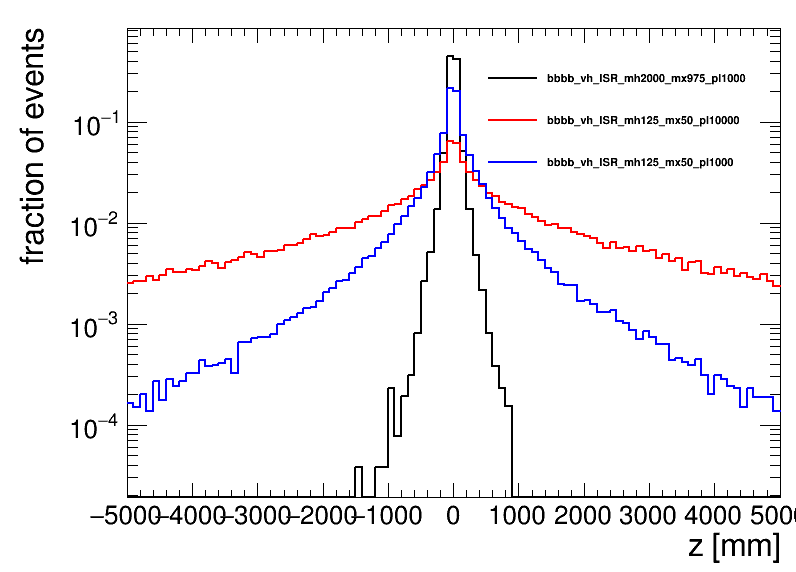

In [383]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.6,0.68,0.95,0.90);
leg.SetTextSize(0.02)
rt.gStyle.SetOptStat(0000)
i = 0

hz ={}
for k,v in tree.items():   
    print(k, v)
    LLP_Vtx_z = v['gLLP_decay_vertex_z'].array()
#     weight = v['genWeight'].array()
    z= LLP_Vtx_z[:,0]
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    hz[k] = create_TH1D( z, axis_title=['z [mm]', 'fraction of events'], name=k, binning=[100,-5000,5000])
    hz[k].SetLineColor(std_color_list[i])
    hz[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(hz[k],k)

#     if i==0:
    hz[k].DrawNormalized('same')
    hz[k].GetYaxis().SetRangeUser(1e-5, 1e50)
#     hz[k].SetMaximum(1.2*hz[k].GetMaximum())
    
    i += 1

leg.SetBorderSize(0)
leg.SetFillStyle(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'LLPGenVtx_z_0.png')
c.SaveAs(out_dir+'LLPGenVtx_z_0.pdf')

bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


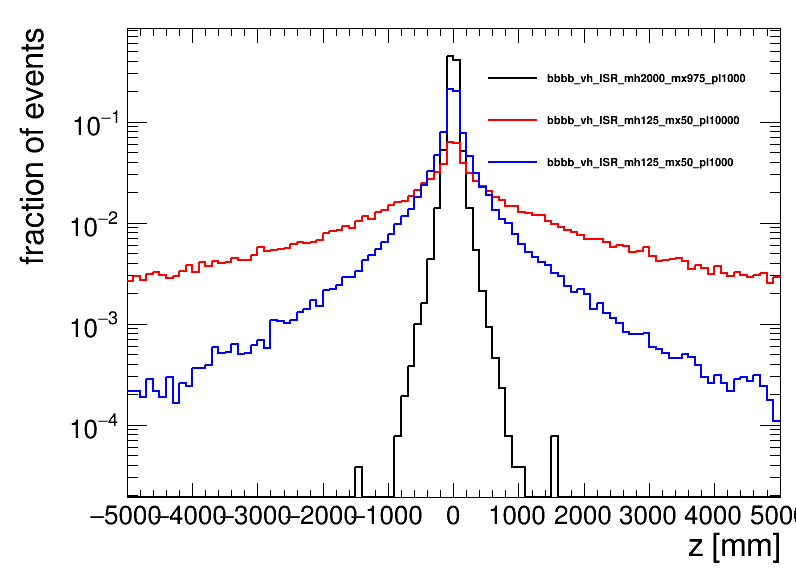

In [384]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.6,0.68,0.95,0.90);
leg.SetTextSize(0.02)
rt.gStyle.SetOptStat(0000)
i = 0

hz ={}
for k,v in tree.items():   
    print(k, v)
    LLP_Vtx_z = v['gLLP_decay_vertex_z'].array()
#     weight = v['genWeight'].array()
    z= LLP_Vtx_z[:,1]
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    hz[k] = create_TH1D( z, axis_title=['z [mm]', 'fraction of events'], name=k, binning=[100,-5000,5000])
    hz[k].SetLineColor(std_color_list[i])
    hz[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(hz[k],k)

#     if i==0:
    hz[k].DrawNormalized('same')
    hz[k].GetYaxis().SetRangeUser(1e-5, 1e50)
#     hz[k].SetMaximum(1.2*hz[k].GetMaximum())
    
    i += 1

leg.SetBorderSize(0)
leg.SetFillStyle(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'LLPGenVtx_z_1.png')
c.SaveAs(out_dir+'LLPGenVtx_z_1.pdf')

bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


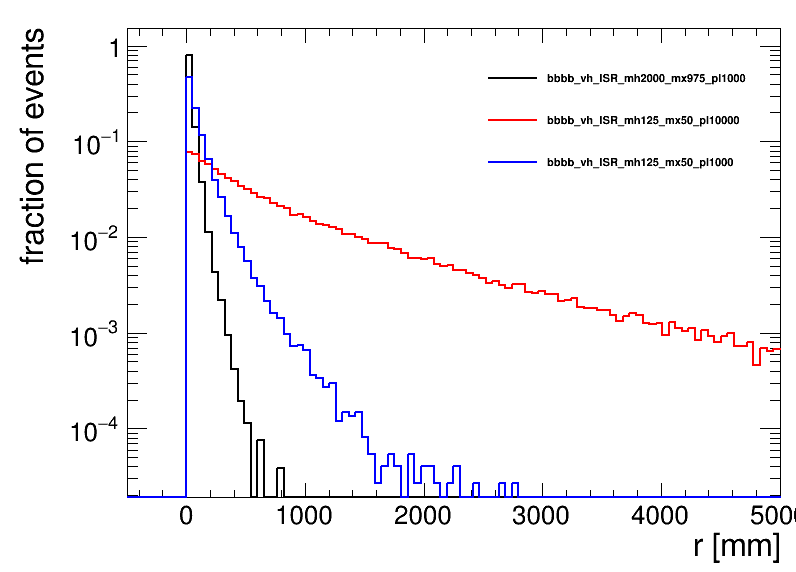

In [385]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.6,0.68,0.95,0.90);
leg.SetTextSize(0.02)
rt.gStyle.SetOptStat(0000)
i = 0

hz ={}
for k,v in tree.items():   
    print(k, v)
    LLP_Vtx_x = v['gLLP_decay_vertex_x'].array()
    LLP_Vtx_y = v['gLLP_decay_vertex_y'].array()
    
    LLP_Vtx_r = []
    for evt,(x,y) in enumerate(zip(LLP_Vtx_x,LLP_Vtx_y)):
#         print(evt,x,y)
        r = math.sqrt(x[0]*x[0]+y[0]*y[0])
#         print(evt,x[0],y[0],r)
#         if evt>5:
#             break
        LLP_Vtx_r.append(r)
    LLP_Vtx_r = np.array(LLP_Vtx_r)
        
    r = LLP_Vtx_r
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    hz[k] = create_TH1D( r, axis_title=['r [mm]', 'fraction of events'], name=k, binning=[100,-500,5000])
    hz[k].SetLineColor(std_color_list[i])
    hz[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(hz[k],k)

#     if i==0:
    hz[k].DrawNormalized('same')
    hz[k].GetYaxis().SetRangeUser(1e-5, 1e50)
#     hz[k].SetMaximum(1.2*hz[k].GetMaximum())
    
    i += 1

leg.SetBorderSize(0)
leg.SetFillStyle(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'LLPGenVtx_r_0.png')
c.SaveAs(out_dir+'LLPGenVtx_r_0.pdf')

bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


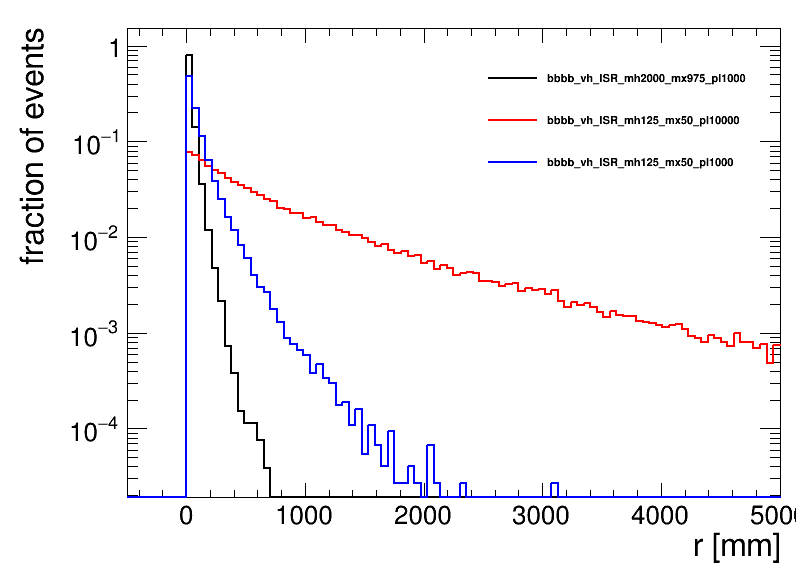

In [386]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.6,0.68,0.95,0.90);
leg.SetTextSize(0.02)
rt.gStyle.SetOptStat(0000)
i = 0

hz ={}
for k,v in tree.items():   
    print(k, v)
    LLP_Vtx_x = v['gLLP_decay_vertex_x'].array()
    LLP_Vtx_y = v['gLLP_decay_vertex_y'].array()
    
    LLP_Vtx_r = []
    for evt,(x,y) in enumerate(zip(LLP_Vtx_x,LLP_Vtx_y)):
#         print(evt,x,y)
        r = math.sqrt(x[1]*x[1]+y[1]*y[1])
#         print(evt,x[0],y[0],r)
#         if evt>5:
#             break
        LLP_Vtx_r.append(r)
    LLP_Vtx_r = np.array(LLP_Vtx_r)
        
    r = LLP_Vtx_r
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    hz[k] = create_TH1D( r, axis_title=['r [mm]', 'fraction of events'], name=k, binning=[100,-500,5000])
    hz[k].SetLineColor(std_color_list[i])
    hz[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(hz[k],k)

#     if i==0:
    hz[k].DrawNormalized('same')
    hz[k].GetYaxis().SetRangeUser(1e-5, 1e50)
#     hz[k].SetMaximum(1.2*hz[k].GetMaximum())
    
    i += 1

leg.SetBorderSize(0)
leg.SetFillStyle(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'LLPGenVtx_r_1.png')
c.SaveAs(out_dir+'LLPGenVtx_r_1.pdf')

bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


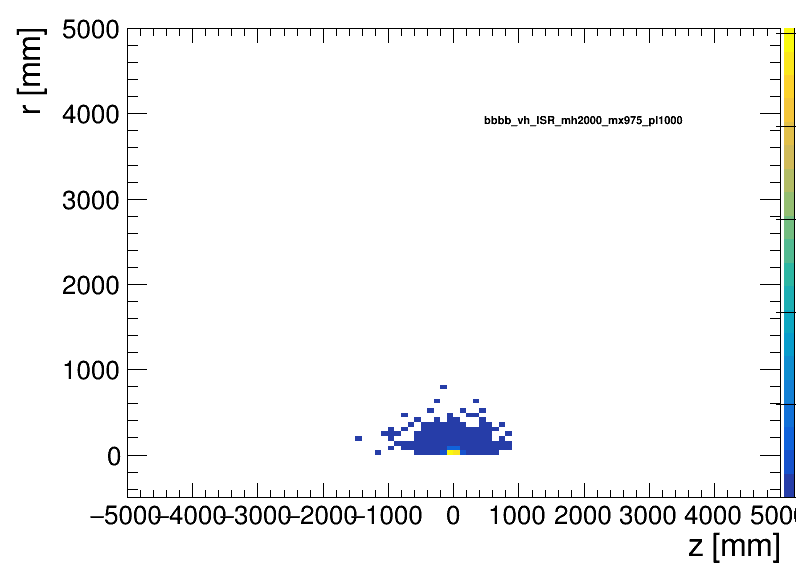

In [387]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.6,0.68,0.95,0.90);
leg.SetTextSize(0.02)
rt.gStyle.SetOptStat(0000)
i = 0

hz ={}
for k,v in tree.items():   
    print(k, v)
    
    hz[k] = rt.TH2D(k,k,100,-5000,5000,100,-500,5000)
    hz[k].GetXaxis().SetTitle('z [mm]')
    hz[k].GetYaxis().SetTitle('r [mm]')
#     hz[k].SetMarkerColor(std_color_list[i])

    
    LLP_Vtx_x = v['gLLP_decay_vertex_x'].array()
    LLP_Vtx_y = v['gLLP_decay_vertex_y'].array()
    LLP_Vtx_z = v['gLLP_decay_vertex_z'].array()
  
    
    LLP_Vtx_r = []
    for evt,(x,y) in enumerate(zip(LLP_Vtx_x,LLP_Vtx_y)):
#         print(evt,x,y)
        r = math.sqrt(x[0]*x[0]+y[0]*y[0])
#         print(evt,x[0],y[0],r)
#         if evt>5:
#             break
        LLP_Vtx_r.append(r)
    LLP_Vtx_r = np.array(LLP_Vtx_r)
        

    for evt,(r,z) in enumerate(zip(LLP_Vtx_r,LLP_Vtx_z)):
        hz[k].Fill(z[0],r)
#         print(evt,x,y)
#         print(evt,r,z[0])
#         if evt>5:
#             break  
            
    


    if i==0:
        leg.SetHeader(k)
        hz[k].Draw('colz')
    
    i += 1

leg.SetBorderSize(0)
leg.SetFillStyle(0)

leg.Draw()
# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'LLPGenVtx_2d_0.png')
c.SaveAs(out_dir+'LLPGenVtx_2d_0.pdf')

bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


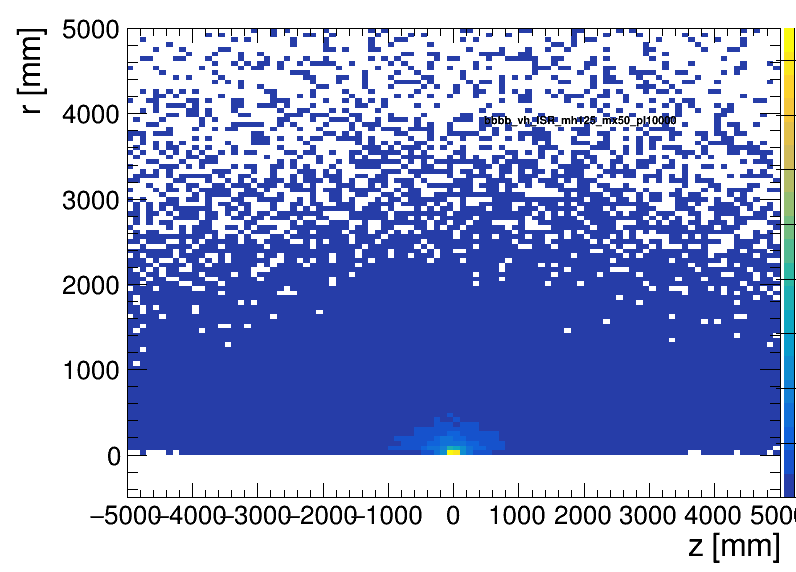

In [388]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.6,0.68,0.95,0.90);
leg.SetTextSize(0.02)
rt.gStyle.SetOptStat(0000)
i = 0

hz ={}
for k,v in tree.items():   
    print(k, v)
    
    hz[k] = rt.TH2D(k,k,100,-5000,5000,100,-500,5000)
    hz[k].SetTitle(k)
    hz[k].GetXaxis().SetTitle('z [mm]')
    hz[k].GetYaxis().SetTitle('r [mm]')
#     hz[k].SetMarkerColor(std_color_list[i])

    
    LLP_Vtx_x = v['gLLP_decay_vertex_x'].array()
    LLP_Vtx_y = v['gLLP_decay_vertex_y'].array()
    LLP_Vtx_z = v['gLLP_decay_vertex_z'].array()
  
    
    LLP_Vtx_r = []
    for evt,(x,y) in enumerate(zip(LLP_Vtx_x,LLP_Vtx_y)):
#         print(evt,x,y)
        r = math.sqrt(x[0]*x[0]+y[0]*y[0])
#         print(evt,x[0],y[0],r)
#         if evt>5:
#             break
        LLP_Vtx_r.append(r)
    LLP_Vtx_r = np.array(LLP_Vtx_r)
        

    for evt,(r,z) in enumerate(zip(LLP_Vtx_r,LLP_Vtx_z)):
        hz[k].Fill(z[0],r)
#         print(evt,x,y)
#         print(evt,r,z[0])
#         if evt>5:
#             break  
            
    


    if i==1:
        leg.SetHeader(k)
        hz[k].Draw('colz')
    
    i += 1

leg.SetBorderSize(0)
leg.SetFillStyle(0)

leg.Draw()
# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'LLPGenVtx_2d_1.png')
c.SaveAs(out_dir+'LLPGenVtx_2d_1.pdf')

bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9bb5b01cc0>
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9bb3370cf8>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9bb7e772b0>


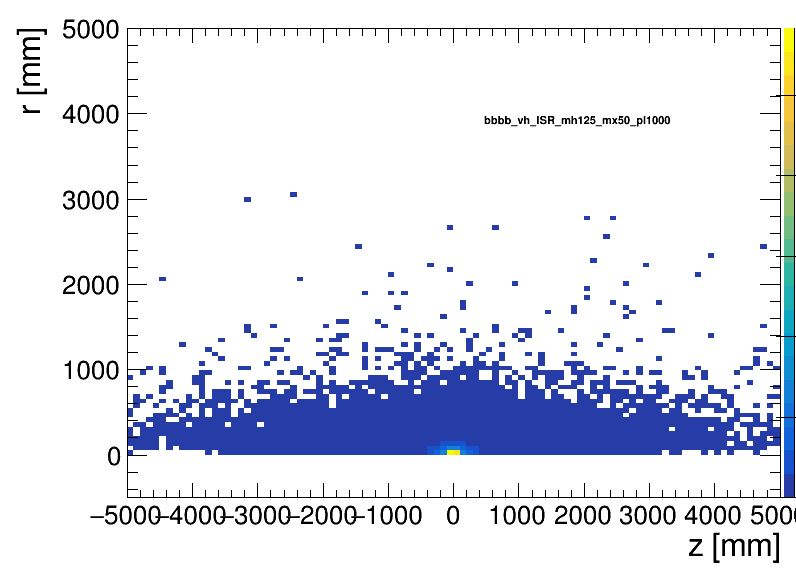

In [389]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.6,0.68,0.95,0.90);
leg.SetTextSize(0.02)
rt.gStyle.SetOptStat(0000)
i = 0

hz ={}
for k,v in tree.items():   
    print(k, v)
    
    hz[k] = rt.TH2D(k,k,100,-5000,5000,100,-500,5000)
    hz[k].SetTitle(k)
    hz[k].GetXaxis().SetTitle('z [mm]')
    hz[k].GetYaxis().SetTitle('r [mm]')
#     hz[k].SetMarkerColor(std_color_list[i])

    
    LLP_Vtx_x = v['gLLP_decay_vertex_x'].array()
    LLP_Vtx_y = v['gLLP_decay_vertex_y'].array()
    LLP_Vtx_z = v['gLLP_decay_vertex_z'].array()
  
    
    LLP_Vtx_r = []
    for evt,(x,y) in enumerate(zip(LLP_Vtx_x,LLP_Vtx_y)):
#         print(evt,x,y)
        r = math.sqrt(x[0]*x[0]+y[0]*y[0])
#         print(evt,x[0],y[0],r)
#         if evt>5:
#             break
        LLP_Vtx_r.append(r)
    LLP_Vtx_r = np.array(LLP_Vtx_r)
        

    for evt,(r,z) in enumerate(zip(LLP_Vtx_r,LLP_Vtx_z)):
        hz[k].Fill(z[0],r)
#         print(evt,x,y)
#         print(evt,r,z[0])
#         if evt>5:
#             break  
            
    


    if i==2:
        leg.SetHeader(k)
        hz[k].Draw('colz')
    
    i += 1

leg.SetBorderSize(0)
leg.SetFillStyle(0)

leg.Draw()
# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'LLPGenVtx_2d_2.png')
c.SaveAs(out_dir+'LLPGenVtx_2d_2.pdf')

In [390]:
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
print(len(t_cuts))
sigma = [0.2,0.4,0.6,0.8,1.]
print(len(sigma))
print(len(tree))
ntr = len(tree)

i=0

Firsts_eb = []
Seconds_eb = []
# loop over events and get an array of maximum jet time in events
for k,v in tree.items():   

#         print(i, k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()

    jetTime = [x-y for x,y in zip(jetGenTime,BSTime)]
    
#     print(jetGenTime[0],BSTime[0], jetTime[0])

    jetPt = v['gLLP_daughter_pt'].array()
    weight = v['genWeight'].array()
    
    for j,sig in enumerate(sigma):
#     for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
#         print('n',n)
        print(i, j, n,len(weight))
        SmearTime = np.random.normal(0,sig,len(BSTime))
        jetNewTime = [x+y for x,y in zip(jetTime,SmearTime)]
#         print(jetTime[0],SmearTime[0], jetNewTime[0])    

    
        jetTime_most_delayed = []
        jetTime_second_delayed = []

        for evt, (time, pt) in enumerate(zip(jetNewTime,jetPt)):
    #         print(i,time,pt,len(time),len(pt))
            time_s =[]
            pt_s= []
            for par in range(len(time)):
    #             print(j,pt[j])
                time_s.append(time[par])
                pt_s.append(pt[par])
    #         print(i,time_s)
    #         print(i,pt_s)
            validpairlist = sort_valid_lists(time_s,pt_s)
    #         print(i,validpairlist)
    #         print(validpairlist[-1][0])
            if len(validpairlist)>1 :
    #             print(i,len(validpairlist))
    #             print(i,validpairlist[-1][0],validpairlist[-2][0])
                jetTime_most_delayed.append(validpairlist[-1][0])
                jetTime_second_delayed.append(validpairlist[-2][0])
            else:
                jetTime_most_delayed.append(-666)
                jetTime_second_delayed.append(-666)
#             if i>2:
#                 break
        jetTime_most_delayed = np.array(jetTime_most_delayed)
        jetTime_second_delayed = np.array(jetTime_second_delayed)
#         print(i, j, n,len(jetTime_most_delayed),len(jetTime_second_delayed))
    
        Firsts_eb.append(jetTime_most_delayed)
        Seconds_eb.append(jetTime_second_delayed)
#         print(n,'found max jet gen time')

    i += 1
    
Firsts_eb = np.array(Firsts_eb)
Seconds_eb = np.array(Seconds_eb)
print('found max, second jet gen time')
print(len(Firsts_eb),len(Seconds_eb))


19
5
3
0 0 0 26133
0 1 1 26133
0 2 2 26133
0 3 3 26133
0 4 4 26133
1 0 5 82611
1 1 6 82611
1 2 7 82611
1 3 8 82611
1 4 9 82611
2 0 10 74588
2 1 11 74588
2 2 12 74588
2 3 13 74588
2 4 14 74588
found max, second jet gen time
15 15


In [348]:
i = 0
Power_1j_eb = []
Power_2j_eb = []

for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()



    for j,sig in enumerate(sigma):
#         print(j,sig)

        Power_eff_1j = []
        Power_eff_2j = []

        n = i*len(sigma)+j
#         print(n)
#         print(i,j,n,len(weight))

        jetGenTime_max = Firsts[n] 
        jetGenTime_second = Seconds[n] 
        print(len(weight),len(Firsts[n]),len(Seconds[n]))
        
        for p, q in enumerate(t_cuts):
#             print(p,q)
#             n = i*ntr+j
#             jetGenTime_max = Firsts[n] 
#             jetGenTime_second = Seconds[n] 
#             if i==1 :
#                 print(len(weight),len(Firsts[n]),len(Seconds[n]))

            tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max>-600)
            tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second>-600)
            tcut_string = np.logical_and( tcut_string1, tcut_string2)
    #         print(tcut_string)
            tcut666_string1 = np.logical_and( jetGenTime_max, jetGenTime_max>-600)
            tcut666_string = np.logical_and( jetGenTime_second>-600, jetGenTime_max>-600)
    #         print(tcut666_string1)
    #         print(tcut666_string)
            weight1_cut666 = weight[tcut666_string1]
            weight_cut666 = weight[tcut666_string]
            Ntotal_1j_w = np.sum(weight1_cut666)
            Ntotal_2j_w = np.sum(weight_cut666)
    #         print('1j total',Ntotal_1j_w)
    #         print('2j total',Ntotal_2j_w)

            tcutted_w_v = weight[tcut_string]
            tcutted_w1_v = weight[tcut_string1]
            tcutted_w2_v = weight[tcut_string2]
    #         Nsel_w = np.sum(tcutted_w_v)
            Nsel_1j_w = np.sum(tcutted_w1_v)
            Nsel_2j_w = np.sum(tcutted_w_v)
    #         print(Nsel_w)
    #         Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
    #         Prej_2j_i = 1.0*Ntotal_w/Nsel_w
    #         Power_rej_2j_i.append(Prej_2j_i)
            Peff_1j_i = 1.0*Nsel_1j_w/Ntotal_1j_w
            Peff_2j_i = 1.0*Nsel_2j_w/Ntotal_2j_w
            Power_eff_1j.append(Peff_1j_i)
            Power_eff_2j.append(Peff_2j_i)

    #     Power_rej_2j_i = np.array(Power_rej_2j_i) 
    # #     print('Rejection power',Power_rej_i)
    #     Power_rej_2j.append(Power_rej_2j_i)

        Power_eff_1j = np.array(Power_eff_1j) 
        Power_eff_2j = np.array(Power_eff_2j) 
#         print('Signal Efficiency 1jet: ',Power_eff_1j)
#         print('Signal Efficiency 2jet: ',Power_eff_2j)
        Power_1j_eb.append(Power_eff_1j)
        Power_2j_eb.append(Power_eff_2j)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_1j_eb = np.array(Power_1j_eb)
Power_2j_eb = np.array(Power_2j_eb)
print(Power_1j_eb)
print(Power_2j_eb)


bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9b8aa47d30>
26133 26133 26133
26133 26133 26133
26133 26133 26133
26133 26133 26133
26133 26133 26133
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9ab7ef94a8>
82611 82611 82611
82611 82611 82611
82611 82611 82611
82611 82611 82611
82611 82611 82611
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9b884863c8>
74588 74588 74588
74588 74588 74588
74588 74588 74588
74588 74588 74588
74588 74588 74588
[[1.         1.         1.         1.         1.         1.
  1.         0.99992284 0.99841758 0.99336134 0.98035432 0.95916474
  0.92979273 0.89466978 0.85557138 0.65000577 0.45489982 0.30360108
  0.19757611]
 [1.         1.         1.         1.         0.99996142 0.99972981
  0.99899642 0.99695091 0.99228071 0.98328766 0.96819638 0.94743137
  0.92052955 0.8863329  0.85229069 0.65039176 0.45486124 0.30773088
  0.20070243]
 [1.         1.         1.         1.         0.99899642 0.99722098
  0.99451924 0.98946311 0.98182099 0.97105

In [239]:
import numpy as np

print('Does Olmo suck?')
if np.random.uniform() > 0.5:
    print ('Yes')
else: print ('No')

Does Olmo suck?
Yes


In [54]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

h1s = {}
h2s = {}

t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
#print len(t_cuts)
# print(len(t_cuts))
sigma = [0.2,0.4,0.6,0.8,1.]

for k,v in tree.items():   
    print(i, k, v)

    for  j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(tree)+j
        print(n)
    
        Power_eff_1j = Power_1j[n] 

        power1 = np.array(Power_eff_1j) 
        print(num, t_cuts, power)
#         h1s[n] = rt.TGraph(num , t_cuts, power1)

#         Power_eff_2j = Power_2j[n] 

#         power2 = np.array(Power_eff_2j) 
#         h2s[n] = rt.TGraph(num , t_cuts, power2)

#         h1s[n].SetLineColor(std_color_list[j])
#         h1s[n].SetMarkerColor(std_color_list[j])
#         h1s[n].SetMarkerStyle(22+i)
#         #     hrej[m].SetMarkerSize(2)

#         h2s[n].SetLineStyle(7)
#         h2s[n].SetLineColor(std_color_list[j])
#         h2s[n].SetMarkerColor(std_color_list[j])
#         h2s[n].SetMarkerStyle(22+i)


#         leg.SetBorderSize(0)
#         leg.AddEntry(h1s[k],k+' One jet')
#         leg.AddEntry(h2s[k],k+' Two jets')

#         h1s[n].SetTitle( 'Signal Efficiency' )
#         h1s[n].GetXaxis().SetTitle( 'Time Cut [ns]' )
#         #hrej[m].GetXaxis().SetRangeUser(-10,10)
#         h1s[n].GetYaxis().SetRangeUser(1e-2,1e1)
#         h1s[n].GetYaxis().SetTitle( 'Signal Efficiency' )
#         if i==0 and j==0:
#             h1s[n].Draw('ALPsame')
#         elif i==0 and j>0:
#             h1s[k].Draw('LPsame')
#             h2s[k].Draw('LPsame')
    
    i += 1


leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear.pdf')


19
0 bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9b8a887080>
0
19 [-5.0, -4.0, -3.0, -2.0, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0] [1.         1.         1.         1.         1.         0.99996837
 0.99981016 0.99740522 0.98395668 0.93253592 0.82621357 0.68929184
 0.56312891 0.45557242 0.36928044 0.1398329  0.060724   0.02841592
 0.0147459 ]
1
19 [-5.0, -4.0, -3.0, -2.0, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0] [1.         1.         1.         1.         1.         0.99996837
 0.99981016 0.99740522 0.98395668 0.93253592 0.82621357 0.68929184
 0.56312891 0.45557242 0.36928044 0.1398329  0.060724   0.02841592
 0.0147459 ]
2
19 [-5.0, -4.0, -3.0, -2.0, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0] [1.         1.         1.         1.         1.         0.99996837
 0.99981016 0.99740522 0.98395668 0.93253592 0.82621357 0.68929184
 0.56312891 0.45557242 0.36928044 0.13

IndexError: index 3 is out of bounds for axis 0 with size 3

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [54]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

h1s = {}
h2s = {}

t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
#print len(t_cuts)
# print(len(t_cuts))
sigma = [0.2,0.4,0.6,0.8,1.]

for k,v in tree.items():   
    print(i, k, v)

    for  j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(tree)+j
        print(n)
    
        Power_eff_1j = Power_1j[n] 

        power1 = np.array(Power_eff_1j) 
        print(num, t_cuts, power)
#         h1s[n] = rt.TGraph(num , t_cuts, power1)

#         Power_eff_2j = Power_2j[n] 

#         power2 = np.array(Power_eff_2j) 
#         h2s[n] = rt.TGraph(num , t_cuts, power2)

#         h1s[n].SetLineColor(std_color_list[j])
#         h1s[n].SetMarkerColor(std_color_list[j])
#         h1s[n].SetMarkerStyle(22+i)
#         #     hrej[m].SetMarkerSize(2)

#         h2s[n].SetLineStyle(7)
#         h2s[n].SetLineColor(std_color_list[j])
#         h2s[n].SetMarkerColor(std_color_list[j])
#         h2s[n].SetMarkerStyle(22+i)


#         leg.SetBorderSize(0)
#         leg.AddEntry(h1s[k],k+' One jet')
#         leg.AddEntry(h2s[k],k+' Two jets')

#         h1s[n].SetTitle( 'Signal Efficiency' )
#         h1s[n].GetXaxis().SetTitle( 'Time Cut [ns]' )
#         #hrej[m].GetXaxis().SetRangeUser(-10,10)
#         h1s[n].GetYaxis().SetRangeUser(1e-2,1e1)
#         h1s[n].GetYaxis().SetTitle( 'Signal Efficiency' )
#         if i==0 and j==0:
#             h1s[n].Draw('ALPsame')
#         elif i==0 and j>0:
#             h1s[k].Draw('LPsame')
#             h2s[k].Draw('LPsame')
    
    i += 1


leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear.pdf')


19
0 bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9b8a887080>
0
19 [-5.0, -4.0, -3.0, -2.0, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0] [1.         1.         1.         1.         1.         0.99996837
 0.99981016 0.99740522 0.98395668 0.93253592 0.82621357 0.68929184
 0.56312891 0.45557242 0.36928044 0.1398329  0.060724   0.02841592
 0.0147459 ]
1
19 [-5.0, -4.0, -3.0, -2.0, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0] [1.         1.         1.         1.         1.         0.99996837
 0.99981016 0.99740522 0.98395668 0.93253592 0.82621357 0.68929184
 0.56312891 0.45557242 0.36928044 0.1398329  0.060724   0.02841592
 0.0147459 ]
2
19 [-5.0, -4.0, -3.0, -2.0, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0] [1.         1.         1.         1.         1.         0.99996837
 0.99981016 0.99740522 0.98395668 0.93253592 0.82621357 0.68929184
 0.56312891 0.45557242 0.36928044 0.13

IndexError: index 3 is out of bounds for axis 0 with size 3

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [85]:
i = 0
Power_rej = []
Power_eff = []
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    beamGenTime = v['genVertexT'].array()
    weight = v['genWeight'].array()
    
    Ntotal_w = np.sum(weight)
    print(Ntotal_w)

    Power_rej_i = []
    Power_eff_i = []

    jetGenTime_max = maxes[i] 

    for p, q in enumerate(t_cuts):
#         print(p,q)
        tcut_string = np.logical_and( beamGenTime > q, jetGenTime_max > -666)
        tcutted_t_v = beamGenTime[tcut_string]
        tcutted_w_v = weight[tcut_string]
    #     Ntotal_w = tcutted_w_v.shape[0]
        Nsel_w = np.sum(tcutted_w_v)
#         print(Nsel_w)
        Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
        Prej_i = 1.0*Ntotal_w/Nsel_w
        Power_rej_i.append(Prej_i)
        Peff_i = 1.0*Nsel_w/Ntotal_w
        Power_eff_i.append(Peff_i)
        
    Power_rej_i = np.array(Power_rej_i) 
    print('Rejection power',Power_rej_i)
    Power_rej.append(Power_rej_i)
    
    Power_eff_i = np.array(Power_eff_i) 
    print('Signal Efficiency',Power_eff_i)
    Power_eff.append(Power_eff_i)
    
    i += 1
    
Power_rej = np.array(Power_rej)        
Power_eff = np.array(Power_eff)


bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4e426430f0>
0.07728062
Rejection power [6.60254237e+00 6.60254237e+00 6.60254237e+00 6.60254237e+00
 6.60254237e+00 6.60254237e+00 6.60254237e+00 6.60465392e+00
 6.67887503e+00 7.58455789e+00 1.32495613e+01 5.23185673e+01
 5.43493496e+02 7.51009201e+03 8.26110153e+04            inf
            inf            inf            inf            inf]
Signal Efficiency [1.51456809e-01 1.51456809e-01 1.51456809e-01 1.51456809e-01
 1.51456809e-01 1.51456809e-01 1.51456809e-01 1.51408388e-01
 1.49725814e-01 1.31846841e-01 7.54741970e-02 1.91136733e-02
 1.83994842e-03 1.33154161e-04 1.21049233e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4e423b8f60>
8.252585
Rejection power [1.00864559e+00 1.00864559e+00 1.00864559e+00 1.00864559e+00
 1.00864559e+00 1.00864559e+00 1.00864559e+00 1.00899606e+00
 1.02034196e+00 1.15801828e+00 2.03132529e+00 7.96737904e+00
 8.653

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4e426430f0>
bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4e423b8f60>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4e423d6320>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190531/SignalEff_GenTimeMax_TimeCutOnBeamSpot.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190531/SignalEff_GenTimeMax_TimeCutOnBeamSpot.pdf has been created


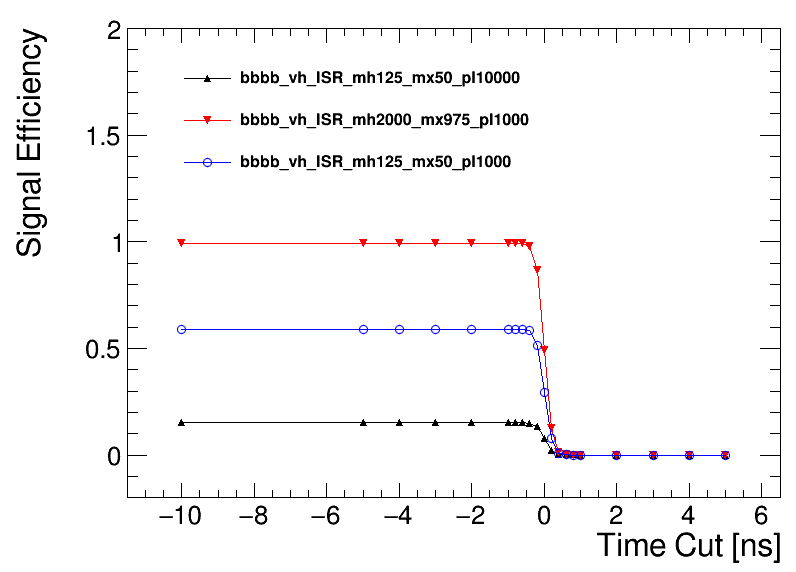

In [86]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.68,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

heff = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)

for k,v in tree.items():   
    print(k, v)

    Power_eff_i = Power_eff[i] 
    
    power = np.array(Power_eff_i) 
    #print num, t_cuts, power
    heff[k] = rt.TGraph(num , t_cuts, power)

    heff[k].SetLineColor(std_color_list[i])
    heff[k].SetMarkerColor(std_color_list[i])
    heff[k].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)


    leg.SetBorderSize(0)
    leg.AddEntry(heff[k],k)

    heff[k].SetTitle( 'Signal Efficiency' )
    heff[k].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    heff[k].GetYaxis().SetRangeUser(-0.2,2)
    heff[k].GetYaxis().SetTitle( 'Signal Efficiency' )
    if i==0 :
        heff[k].Draw('ALPsame')
    else:
        heff[k].Draw('LPsame')
    
    i += 1


leg.Draw()
# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTimeMax_TimeCutOnBeamSpot.png')
c.SaveAs(out_dir+'SignalEff_GenTimeMax_TimeCutOnBeamSpot.pdf')
